PROJEKT

Projekt dotyczy analizy danych ofert sprzedaży mieszkań z  15 największych miast w Polsce. Są to  Białystok
Bydgoszcz
Częstochowa
Gdańsk
Gdynia
Katowice
Kraków
Lublin
Łódź
Poznań
Radom
Rzeszów
Szczecin
Warszawa
Wrocław

In [2]:
#Importowanie bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Wyjaśnienia zmiennych 

- **city** — Nazwa miasta, w którym znajduje się nieruchomość.
- **type** — Typ budynku (np. blockOfFlats – blok, apartmentBuilding – kamienica/budynek wielorodzinny).
- **squareMeters** — Powierzchnia mieszkania w metrach kwadratowych (m²).
- **rooms** — Liczba pokoi w mieszkaniu.
- **floor** — Piętro, na którym zlokalizowane jest mieszkanie.
- **floorCount** — Całkowita liczba pięter w budynku.
- **buildYear** — Rok budowy budynku.
- **latitude, longitude** — Współrzędne geograficzne nieruchomości.
- **centreDistance** — Odległość od centrum miasta (w km).
- **poiCount** — Liczba punktów użyteczności publicznej (POI) w promieniu 500 m od mieszkania.
- **[poiName]Distance** — Odległość do najbliższego punktu użyteczności publicznej danego typu (np. schoolDistance, pharmacyDistance).
- **ownership** — Rodzaj własności (np. condominium – własność, cooperative – spółdzielcze).
- **condition** — Stan/standard wykończenia mieszkania (np. premium, high, low).
- **has[features]** — Zmienne logiczne (tak/nie) opisujące udogodnienia:
-  **hasParkingSpace**, **hasBalcony**, **hasElevator**, **hasSecurity**, **hasStorageRoom**.
- **price** — Cena oferty w Polskich Złotych (PLN).


In [3]:
# pobranie danych z pliku CSV i wyświetlenie pierwszych kilku wierszy
import pandas as pd
df = pd.read_csv("apartments_pl_2024_06.csv", encoding="utf-8")
print(df.head())

                                 id      city               type  \
0  811891f98a870dfd6e414374a0a85560  szczecin       blockOfFlats   
1  adaf636d0c44d8d9325bce42403eefee  szczecin  apartmentBuilding   
2  9b957bd60885a469c96f17b58a914f4b  szczecin  apartmentBuilding   
3  74fef2ff7135bc70797a3fbfd7d44ed6  szczecin       blockOfFlats   
4  77cc78c75b0d09bf84d6d3124a28803c  szczecin       blockOfFlats   

   squareMeters  rooms  floor  floorCount  buildYear   latitude  longitude  \
0         47.00    2.0    6.0        12.0     1981.0  53.428544  14.552812   
1         88.22    3.0    1.0         2.0     2000.0  53.449093  14.516844   
2        117.00    5.0    4.0         4.0        NaN  53.443096  14.561348   
3         33.31    1.0    1.0         4.0     1963.0  53.436100  14.541200   
4         56.00    3.0    7.0         7.0     2018.0  53.447465  14.557811   

   ...  pharmacyDistance    ownership  buildingMaterial  condition  \
0  ...             0.085  condominium      concreteS

In [4]:
# liczba brakujacych danych (całkowita)
n_miss = df.isna().sum().sum()
print("n_miss:", n_miss)  

# liczba kompletnych obserwacji (wierszy bez braków)
n_complete = df.dropna().shape[0]
print("n_complete:", n_complete)  # liczba kompletnych obserwacji

# proporcja braków (w skali całego dataframe)
prop_miss = n_miss / (df.shape[0] * df.shape[1])
print("prop_miss:", prop_miss)  # proporcja brakujacych danych

# dodatkowo: brakujące wartości na kolumnę (opcjonalne)
print("missing per column:\n", df.isna().sum())

# show computed values (do not call integers/floats as functions)
print("n_complete (computed):", n_complete)  # liczba kompletnych obserwacji
print("prop_miss (computed):", prop_miss)    # proporcja

n_miss: 37990
n_complete: 2750
prop_miss: 0.0631033772515564
missing per column:
 id                          0
city                        0
type                     4397
squareMeters                0
rooms                       0
floor                    3573
floorCount                209
buildYear                3380
latitude                    0
longitude                   0
centreDistance              0
poiCount                    0
schoolDistance             11
clinicDistance             63
postOfficeDistance         20
kindergartenDistance       19
restaurantDistance         31
collegeDistance           584
pharmacyDistance           30
ownership                   0
buildingMaterial         8792
condition               15921
hasParkingSpace             0
hasBalcony                  0
hasElevator               960
hasSecurity                 0
hasStorageRoom              0
price                       0
dtype: int64
n_complete (computed): 2750
prop_miss (computed): 0.0631033772515

In [5]:
# wizualizacja brakujących danych 
import missingno as msno
# jeśli plt nie jest zdefiniowane (np. komórka z importem nie została uruchomiona), zaimportuj je
try:
	plt
except NameError:
	import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

ModuleNotFoundError: No module named 'missingno'

In [6]:
# proporcja braków w poszczególnych kolumnach
prop_miss_cols = df.isna().sum() / df.shape[0]

print("Proporcje braków w kolumnach:")
print(prop_miss_cols)

# wizualizacja braków w kolumnach
prop_miss_cols_pct = df.isna().mean() * 100
print("Procent braków w kolumnach:")
print(prop_miss_cols_pct)


Proporcje braków w kolumnach:
id                      0.000000
city                    0.000000
type                    0.204502
squareMeters            0.000000
rooms                   0.000000
floor                   0.166178
floorCount              0.009720
buildYear               0.157202
latitude                0.000000
longitude               0.000000
centreDistance          0.000000
poiCount                0.000000
schoolDistance          0.000512
clinicDistance          0.002930
postOfficeDistance      0.000930
kindergartenDistance    0.000884
restaurantDistance      0.001442
collegeDistance         0.027162
pharmacyDistance        0.001395
ownership               0.000000
buildingMaterial        0.408911
condition               0.740477
hasParkingSpace         0.000000
hasBalcony              0.000000
hasElevator             0.044649
hasSecurity             0.000000
hasStorageRoom          0.000000
price                   0.000000
dtype: float64
Procent braków w kolumnach:
id 

Wykres przedstawia brakujące wartości w badanym zbiorze danych.
 Ciemne pola to dane kompletne, a białe brakujące.
 Zmienne niemal kompletne to: city, type, squareMeters, rooms, latitude, longitude, price.
 Są one istotnymi zmiennymi w kwestii zróżnicowania mieszkań i są całkowicie pozbawione braków.
 Przedstawia to jednolity ciemny wykres. Występują również zmienne z umiarkowanymi brakami. Sądzac z wykresu braki występują losowo i  raczej równomiernie w kolumnach: floorCount (0.9%),  zmiennych określajacych dystans ( które są też mniejsze niż 1%). 
 Zmienne : type, buildingMaterial i condition, mają duża częśc obserwacji brakujących. Jesto to odpowiednio 20%, 41%,74%. Będą one szczególnej uwagi przy czyszczeniu danych imputacja lub ich usunięcie.Podsumowując, większość kluczowych danych lokalizacja, metraż, cena jest kompletna, co czyni zbiór gotowym do dalszej analizy. Braki koncentrują się głównie na zmiennych opisujących wyposażenie i stan budynku.

In [7]:

msno.bar(df)
plt.show()

NameError: name 'msno' is not defined

In [8]:
def is_special(x):
    if np.issubdtype(x.dtype, np.number):
        return ~np.isfinite(x)
    else:
        return x.isna()

df.apply(is_special)

id   city   type  squareMeters  rooms  floor  floorCount  buildYear  \
0      False  False  False         False  False  False       False      False   
1      False  False  False         False  False  False       False      False   
2      False  False  False         False  False  False       False       True   
3      False  False  False         False  False  False       False      False   
4      False  False  False         False  False  False       False      False   
...      ...    ...    ...           ...    ...    ...         ...        ...   
21496  False  False   True         False  False  False       False       True   
21497  False  False  False         False  False   True       False      False   
21498  False  False  False         False  False  False       False      False   
21499  False  False   True         False  False  False       False       True   
21500  False  False  False         False  False  False       False      False   

       latitude  longitude  ...  pharmacyDistance  ownership  \
0         False      False  ...             False      False   
1         False      False  ...             False      False   
2         False      False  ...             False      False   
3         False      False  ...             False      False   
4         False      False  ...             False      False   
...         ...        ...  ...               ...        ...   
21496     False      False  ...             False      False   
21497     False      False  ...             False      False   
21498     False      False  ...             False      False   
21499     False      False  ...             False      False   
21500     False      False  ...             False      False   

       buildingMaterial  condition  hasParkingSpace  hasBalcony  hasElevator  \
0                 False       True            False       False        False   
1                 False      False            False       False        False   
2                 False      False            False       False        False   
3                 False       True            False       False        False   
4                 False      False            False       False        False   
...                 ...        ...              ...         ...          ...   
21496              True       True            False       False        False   
21497             False       True            False       False        False   
21498             False       True            False       False        False   
21499             False       True            False       False        False   
21500             False       True            False       False        False   

       hasSecurity  hasStorageRoom  price  
0            False           False  False  
1            False           False  False  
2            False           False  False  
3            False           False  False  
4            False           False  False  
...            ...             ...    ...  
21496        False           False  False  
21497        False           False  False  
21498        False           False  False  
21499        False           False  False  
21500        False           False  False  

[21501 rows x 28 columns]

In [9]:
import numpy as np
import pandas as pd

# Twoja funkcja definująca co jest "specjalne"
def is_special(x):
    if np.issubdtype(x.dtype, np.number):
        return ~np.isfinite(x) # Zwraca True dla NaN oraz inf/-inf
    else:
        return x.isna()
total_special = df.apply(is_special).sum()
just_na = df.isna().sum()
def count_inf(x):
    if np.issubdtype(x.dtype, np.number):
        return np.isinf(x).sum()
    return 0

just_inf = df.apply(count_inf)

# Tabela podsumowującą
raport = pd.DataFrame({
    'Wszystkie Specjalne': total_special,
    'Tylko Braki (NA)': just_na,
    'Tylko Nieskończoności (Inf)': just_inf
})

# Filtrujemy, żeby pokazać tylko kolumny, gdzie cokolwiek wykryto
raport_z_bledami = raport[raport['Wszystkie Specjalne'] > 0]

print(raport_z_bledami)

                      Wszystkie Specjalne  Tylko Braki (NA)  \
type                                 4397              4397   
floor                                3573              3573   
floorCount                            209               209   
buildYear                            3380              3380   
schoolDistance                         11                11   
clinicDistance                         63                63   
postOfficeDistance                     20                20   
kindergartenDistance                   19                19   
restaurantDistance                     31                31   
collegeDistance                       584               584   
pharmacyDistance                       30                30   
buildingMaterial                     8792              8792   
condition                           15921             15921   
hasElevator                           960               960   

                      Tylko Nieskończoności (Inf)  
ty

In [10]:
# Liczba wierszy do odrzucenia (mają złą cenę LUB zły rok)
liczba_do_odrzucenia = ((df["price"] < 150000)).sum()

print(f"Liczba ofert do odrzucenia: {liczba_do_odrzucenia}")


Liczba ofert do odrzucenia: 0


W zbiorze danych występują jedynie braki danych w postaci wartości NaN (braków typowych). Nie ma innych "specjalnych" braków, takich jak nieskończoności (Inf) czy wartości nieprawidłowe np. cena poniżej 150 tys złotych.

<Figure size 1200x500 with 0 Axes>

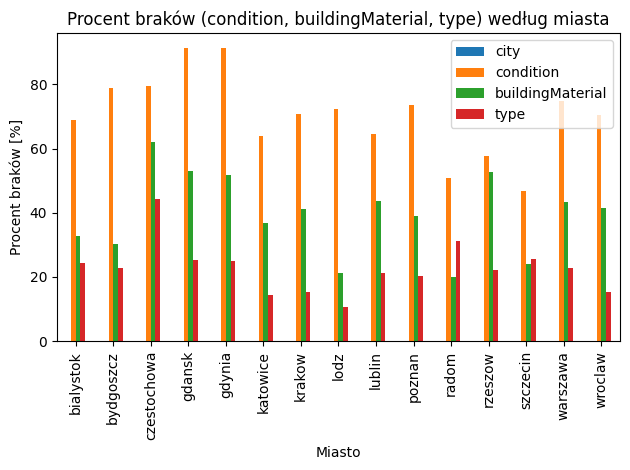

In [11]:


# --- Funkcja: procent braków wg miasta ---
def gg_miss_city_selected(df, 
                          city_col="city",
                          selected_cols=["condition", "buildingMaterial", "type"],
                          figsize=(12,5)):

    # filtr tylko wybranych kolumn
    df_selected = df[[city_col] + selected_cols]

    # liczba obserwacji w każdym mieście
    count_by_city = df_selected.groupby(city_col).size()

    # liczba braków w poszczególnych kolumnach wg miasta
    miss_count = df_selected.isna().groupby(df_selected[city_col]).sum()

    # procent braków = (liczba braków / liczba rekordów) * 100
    miss_pct = (miss_count.T / count_by_city).T * 100

    # wykres
    plt.figure(figsize=figsize)
    miss_pct.plot(kind="bar")
    plt.title("Procent braków (condition, buildingMaterial, type) według miasta")
    plt.ylabel("Procent braków [%]")
    plt.xlabel("Miasto")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# --- Wywołanie ---
gg_miss_city_selected(df)


In [12]:
# Oblicz procent braków w danych dla każdego miasta (liczony jako: brakujące wartości / (liczba rekordów * liczba kolumn) * 100)
n_cols = df.shape[1]
city_counts = df.groupby("city").size()
missing_counts = df.groupby("city").apply(lambda g: g.isna().sum().sum())
missing_pct_by_city = (missing_counts / (city_counts * n_cols)) * 100

# Posortuj malejąco i pokaż wynik
missing_pct_by_city = missing_pct_by_city.sort_values(ascending=False)
print(missing_pct_by_city)

# Najgorsze miasto
worst_city = missing_pct_by_city.index[0]
worst_pct = missing_pct_by_city.iloc[0]
print(f"\nMiasto z największym procentem braków: {worst_city} ({worst_pct:.2f}%)")

city
czestochowa    9.582560
gdynia         8.096101
gdansk         7.495324
bydgoszcz      6.735021
katowice       6.661046
poznan         6.575392
rzeszow        6.332165
warszawa       6.152276
krakow         5.976227
wroclaw        5.793546
lublin         5.711797
bialystok      5.674088
lodz           5.655994
szczecin       5.199823
radom          5.091575
dtype: float64

Miasto z największym procentem braków: czestochowa (9.58%)


C:\Users\levia\AppData\Local\Temp\ipykernel_15184\4292239163.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_counts = df.groupby("city").apply(lambda g: g.isna().sum().sum())


Na przedstawionym wykresie kolumnowym widzimy udział brakujących wartości dla trzech zmiennych opisujących oferty mieszkaniowe analizowane w tym projekcie: condition, buildingMaterial oraz type, pogrupowanych według miasta. Brak definiujemy jako brak jednej zmiennej w danym ogłoszeniu.
Najbardziej wyróżnia się zmienna condition, która we wszystkich miastach charakteryzuje się zdecydowanie najwyższym odsetkiem braków. 
W przypadku pozostałych zmiennych udziały braków są mniejsze, choć zauważalnie zróżnicowane pomiędzy miastami. Co ciekawe, mimo że średni poziom braków w zmiennej buildingMaterial jest wyższy, to w części miast występuje odwrotna zależność — np. w Częstochowie i Gdansku odsetek braków dla type jest większy niż dla buildingMaterial.
Miasta o najniższej jakości pełnych informacji w ogłoszeniach to:

Częstochowa – niemal 10% wszystkich informacji w analizowanych zmiennych jest nieuzupełnionych,

Gdynia – około 8%,

Gdańsk – blisko 7,5%.

Wskazuje to, że w tych miastach użytkownicy rynku nieruchomości mogli częściej napotkać niekompletne opisy ofert w czerwcu 2024, co mogło utrudniac porównywanie mieszkań i podejmowanie decyzji zakupowych.

In [53]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # Konieczne aktywowanie
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, IterativeImputer

# 1. Grupa: Dane opisowe z dużymi brakami condition i buildingMaterial - usuwamy
df.drop(columns=['condition', 'buildingMaterial'], inplace=True)


# 2. Grupa: Numeryczne ważne (floor, buildYear,floorCount i wszystkie zmienne distance) 
import pandas as pd
import numpy as np


# A. Lista zmiennych, które chcesz naprawić metodą MICE
cols_to_impute = [
    'buildYear', 
    'floor', 
    'floorCount', 
    'centreDistance',
    'poiCount',
    'schoolDistance',
    'clinicDistance',
    'postOfficeDistance',
    'kindergartenDistance',
    'restaurantDistance',
    'collegeDistance',
    'pharmacyDistance'
]

# B. Konfiguracja imputera (random_state dla powtarzalności wyników)
iter_imputer = IterativeImputer(random_state=42)

# C. Wykonanie imputacji TYLKO na wybranych kolumnach
# Wynik fit_transform to macierz NumPy, więc przypisujemy ją z powrotem do tych samych kolumn w df
df[cols_to_impute] = iter_imputer.fit_transform(df[cols_to_impute])

# D. Zaokrąglamy rok budowy, piętro na którym znajduje się mieszkanie i liczbę pięter do liczb całkowitych. 
cols_integers = ['buildYear', 'floor', 'floorCount']

for col in cols_integers:
    # 
    df[col] = df[col].round().astype('Int64') # Int64 (z dużej litery) pozwala zachować format integer

# E. Sprawdzenie efektów (czy zniknęły braki w tych kolumnach)
print("Braki danych po MICE:")
print(df[cols_to_impute].isna().sum())

# 3. Grupa: Winda (binarna/kategoryczna) -> KNN Imputer
from sklearn.impute import KNNImputer
import numpy as np

# 1. PRZYGOTOWANIE: Zamieniamy YES/NO na 1/0 
df['hasElevator'] = df['hasElevator'].map({'yes':1, 'no':0})
df['hasElevator'] = df['hasElevator'].astype(float)



from sklearn.preprocessing import MinMaxScaler
import pandas as pd

#  Wybór cech: Winda (cel) + Lokalizacja + Cechy budynku
# Dodajemy latitude i longitude
features_knn = ['hasElevator', 'latitude', 'longitude', 'floorCount', 'buildYear']

#  PRZYGOTOWANIE DANYCH (Skalowanie)
# Tworzymy tymczasową kopię danych do obliczeń
df_temp = df[features_knn].copy()

# Skaler sprowadzi wszystkie kolumny do zakresu 0-1
scaler = MinMaxScaler()
df_temp_scaled = pd.DataFrame(scaler.fit_transform(df_temp), columns=features_knn)

#  URUCHOMIENIE KNN NA PRZESKALOWANYCH DANYCH
# Teraz odległość geograficzna ma takie samo znaczenie jak rok budowy
knn_imputer = KNNImputer(n_neighbors=5)
df_filled_scaled = knn_imputer.fit_transform(df_temp_scaled)

#  ODZYSKANIE WYNIKU
# Wynik jest w skali 0-1. Interesuje nas tylko kolumna hasElevator (indeks 0 w features_knn)
# Musimy ją "odwrócić" ze skalowania lub po prostu zaokrąglić, 
# bo dla 0 i 1 MinMaxScaler(0,1) nie zmienia wartości logicznej, ale dla pewności:

# Wyciągamy kolumnę z macierzy (to są ułamki np. 0.8, 0.2)
imputed_values = df_filled_scaled[:, 0]

# Zaokrąglamy do 0 lub 1 i przypisujemy do oryginalnego DataFrame
df['hasElevator'] = imputed_values.round().astype('int64')

# Sprawdzenie
print("Braki po KNN z lokalizacją:", df['hasElevator'].isna().sum())


## teraz imputacja zmiennej typu budynku (type) za pomocą KNN z lokalizacją

#  WYBÓR CECH 
# Typ budynku zależy mocno od: roku budowy, liczby pięter i lokalizacji.
features = ['latitude', 'longitude', 'buildYear', 'floorCount']
target = 'type'

# 2. PRZYGOTOWANIE DANYCH
# Musimy podzielić dane na dwie grupy:
# A. Treningowe: Tam gdzie ZNAMY typ (uczymy się na nich)
# B. Do uzupełnienia: Tam gdzie typ to NaN (będziemy zgadywać)
train_data = df[df[target].notna()].copy()
missing_data = df[df[target].isna()].copy()

# Jeśli nie ma czego uzupełniać, kończymy
if len(missing_data) > 0:
    
    # 3. SKALOWANIE 
    # Żeby rok budowy (2000) nie zdominował współrzędnych (52.00)
    scaler = MinMaxScaler()
    
    # Skalujemy cechy w obu zestawach
    X_train = scaler.fit_transform(train_data[features])
    X_missing = scaler.transform(missing_data[features]) # Ważne: transform, nie fit_transform!
    
    # Nasz cel (etykiety) - to są teksty, np. "tenement", "block"
    y_train = train_data[target]

    # 4. KONFIGURACJA I NAUKA (Głosowanie)
    # n_neighbors=10: Spytaj 10 najbliższych budynków, czym są.
    # weights='distance': Bliżsi sąsiedzi mają ważniejszy głos.
    from sklearn.neighbors import KNeighborsClassifier
    knn_classifier = KNeighborsClassifier(n_neighbors=10, weights='distance')
    knn_classifier.fit(X_train, y_train)

    # 5. PRZEWIDYWANIE (Uzupełnianie braków)
    predicted_types = knn_classifier.predict(X_missing)

    # 6. WSTAWIENIE DO TABELI
    # Wstawiamy przewidziane wartości tylko tam, gdzie były braki
    df.loc[df[target].isna(), target] = predicted_types

    print("Sukces! Braki w 'type' po głosowaniu sąsiadów:", df['type'].isna().sum())
    
else:
    print("Brak brakujących danych w kolumnie 'type'.")



# 5.Sprawdzenie czy czysto
print("Pozostałe braki:", df.isna().sum().sum())

Braki danych po MICE:
buildYear               0
floor                   0
floorCount              0
centreDistance          0
poiCount                0
schoolDistance          0
clinicDistance          0
postOfficeDistance      0
kindergartenDistance    0
restaurantDistance      0
collegeDistance         0
pharmacyDistance        0
dtype: int64
Braki po KNN z lokalizacją: 0
Sukces! Braki w 'type' po głosowaniu sąsiadów: 0
Pozostałe braki: 0


In [56]:
# Pokaż kolumny i liczbę brakujących wartości (oraz procent braków)
missing_count = df.isna().sum()
missing_pct = df.isna().mean() * 100

missing_summary = pd.DataFrame({
    'missing_count': missing_count,
    'missing_pct': missing_pct
}).sort_values(by='missing_count', ascending=False)

# Wyświetl wszystkie kolumny (posortowane malejąco według liczby braków)
print(missing_summary)

# Jeśli chcesz tylko kolumny z brakami:
print("\nKolumny z brakami:")
print(missing_summary[missing_summary['missing_count'] > 0])

                      missing_count  missing_pct
id                                0          0.0
city                              0          0.0
type                              0          0.0
squareMeters                      0          0.0
rooms                             0          0.0
floor                             0          0.0
floorCount                        0          0.0
buildYear                         0          0.0
latitude                          0          0.0
longitude                         0          0.0
centreDistance                    0          0.0
poiCount                          0          0.0
schoolDistance                    0          0.0
clinicDistance                    0          0.0
postOfficeDistance                0          0.0
kindergartenDistance              0          0.0
restaurantDistance                0          0.0
collegeDistance                   0          0.0
pharmacyDistance                  0          0.0
ownership           

In [15]:
# ========================================
# CZĘŚĆ 1: PRZEGLĄD DATASETU
# ========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ustawienia wizualizacji
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# Zakładam, że df jest już wczytany i przetworzony zgodnie z Twoim kodem
# df = pd.read_csv("apartments_pl_2024_06.csv", encoding="utf-8")
# ... (cały Twój kod czyszczenia danych)

print("="*60)
print("PRZEGLĄD DATASETU - Rynek mieszkaniowy w Polsce")
print("="*60)

# 1. Podstawowe informacje
print(f"\n Liczba obserwacji: {df.shape[0]:,}")
print(f" Liczba zmiennych: {df.shape[1]}")
print(f"\n  Liczba miast w analizie: {df['city'].nunique()}")

# 2. Rozkład obserwacji po miastach
print("\n" + "="*60)
print("ROZKŁAD OBSERWACJI PO MIASTACH")
print("="*60)

city_counts = df['city'].value_counts().sort_values(ascending=False)
city_pct = (city_counts / len(df) * 100).round(2)

city_summary = pd.DataFrame({
    'Liczba ofert': city_counts,
    'Procent (%)': city_pct
})

print(city_summary)

# 3. Podstawowe statystyki dla kluczowych zmiennych
print("\n" + "="*60)
print("STATYSTYKI OPISOWE - KLUCZOWE ZMIENNE")
print("="*60)

# Dodajemy zmienną cena za m²
df['price_per_m2'] = df['price'] / df['squareMeters']

key_vars = ['price', 'price_per_m2', 'squareMeters', 'rooms', 'buildYear', 'centreDistance']
stats = df[key_vars].describe().round(2)

print(stats)

# 4. Dodatkowe informacje o cenach
print("\n" + "="*60)
print("ZAKRES CENOWY W DATASECIE")
print("="*60)

print(f"Najtańsze mieszkanie: {df['price'].min():,.0f} PLN")
print(f"Najdroższe mieszkanie: {df['price'].max():,.0f} PLN")
print(f"Średnia cena: {df['price'].mean():,.0f} PLN")
print(f"Mediana ceny: {df['price'].median():,.0f} PLN")

print(f"\n Średnia cena za m²: {df['price_per_m2'].mean():,.0f} PLN/m²")
print(f"mMediana ceny za m²: {df['price_per_m2'].median():,.0f} PLN/m²")

# 5. Informacja o typach budynków
print("\n" + "="*60)
print("TYPY BUDYNKÓW W DATASECIE")
print("="*60)

type_counts = df['type'].value_counts()
type_pct = (type_counts / len(df) * 100).round(2)

type_summary = pd.DataFrame({
    'Liczba': type_counts,
    'Procent (%)': type_pct
})

print(type_summary)

print("\n✅ Przegląd datasetu zakończony!")
print("="*60)

PRZEGLĄD DATASETU - Rynek mieszkaniowy w Polsce

 Liczba obserwacji: 21,501
 Liczba zmiennych: 29

  Liczba miast w analizie: 15

ROZKŁAD OBSERWACJI PO MIASTACH
             Liczba ofert  Procent (%)
city                                  
warszawa             6962        32.38
krakow               3245        15.09
wroclaw              2271        10.56
gdansk               1986         9.24
lodz                 1691         7.86
bydgoszcz             937         4.36
gdynia                828         3.85
poznan                793         3.69
szczecin              647         3.01
katowice              593         2.76
lublin                574         2.67
czestochowa           385         1.79
bialystok             231         1.07
radom                 195         0.91
rzeszow               163         0.76

STATYSTYKI OPISOWE - KLUCZOWE ZMIENNE
            price  price_per_m2  squareMeters     rooms  buildYear  \
count    21501.00      21501.00      21501.00  21501.00   18121.00 

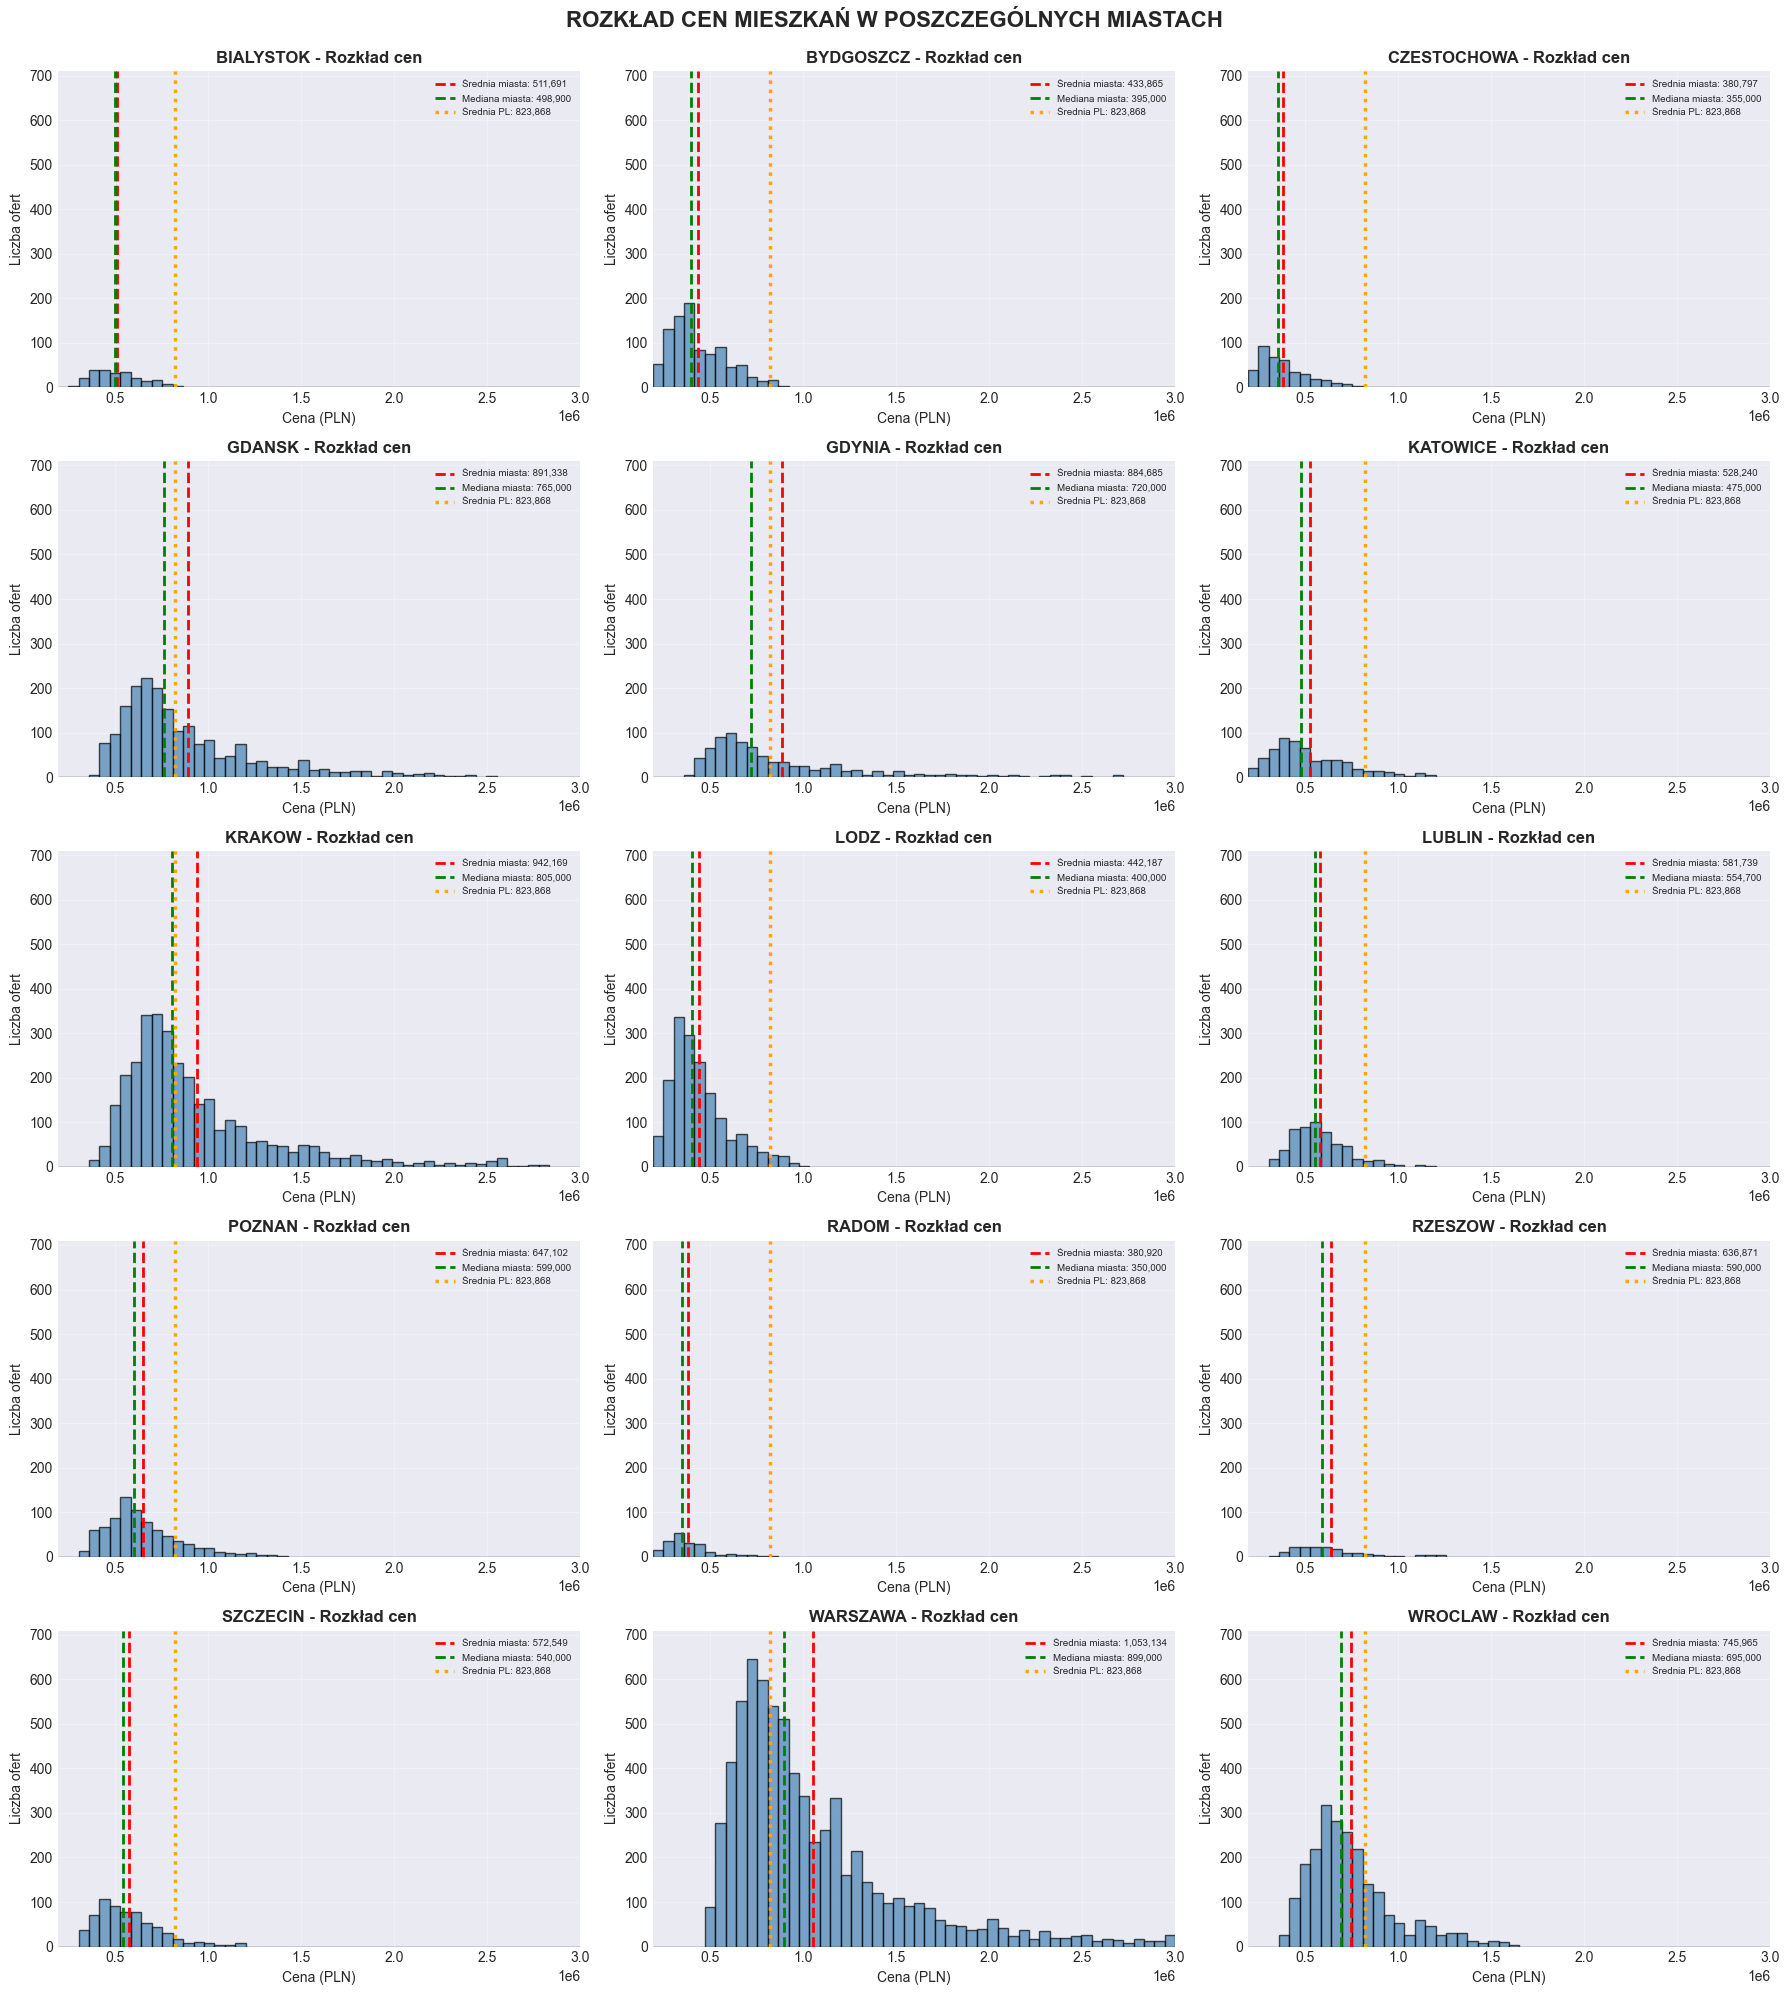

✅ Histogramy cen dla wszystkich miast wygenerowane!


In [35]:
# ========================================
# CZĘŚĆ 2: ANALIZA CENOWA - HISTOGRAMY
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lista wszystkich miast
cities = df['city'].unique()
n_cities = len(cities)

# ========================================
# 2.1 HISTOGRAMY CENY - KAŻDE MIASTO OSOBNO
# ========================================

# Obliczamy globalną średnią dla wszystkich miast
global_mean_price = df['price'].mean()
global_median_price = df['price'].median()

# Ustalamy wspólną skalę osi X i Y
x_min, x_max = df['price'].min(), df['price'].max()

fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.flatten()

# Najpierw liczymy maksymalną liczbę ofert dla ujednolicenia osi Y
max_count = 0
for city in cities:
    city_data = df[df['city'] == city]['price']
    counts, _ = np.histogram(city_data, bins=50, range=(x_min, x_max))
    max_count = max(max_count, counts.max())

for idx, city in enumerate(sorted(cities)):
    city_data = df[df['city'] == city]['price']
    
    axes[idx].hist(city_data, bins=50, range=(x_min, x_max), edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'{city.upper()} - Rozkład cen', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Cena (PLN)', fontsize=10)
    axes[idx].set_ylabel('Liczba ofert', fontsize=10)
    
    # Ustawiamy wspólną skalę
    axes[idx].set_xlim(x_min, x_max)
    axes[idx].set_ylim(0, max_count * 1.1)
    
    # Dodajemy statystyki dla danego miasta
    mean_price = city_data.mean()
    median_price = city_data.median()
    
    axes[idx].axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Średnia miasta: {mean_price:,.0f}')
    axes[idx].axvline(median_price, color='green', linestyle='--', linewidth=2, label=f'Mediana miasta: {median_price:,.0f}')
    
    # Dodajemy globalną średnią wszystkich miast
    axes[idx].axvline(global_mean_price, color='orange', linestyle=':', linewidth=2.5, label=f'Średnia PL: {global_mean_price:,.0f}')
    
    axes[idx].legend(fontsize=7, loc='upper right')
    axes[idx].grid(True, alpha=0.3)

# Ukrywamy puste subploty (jeśli liczba miast < 15)
for idx in range(n_cities, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('ROZKŁAD CEN MIESZKAŃ W POSZCZEGÓLNYCH MIASTACH', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✅ Histogramy cen dla wszystkich miast wygenerowane!")
print("="*60)

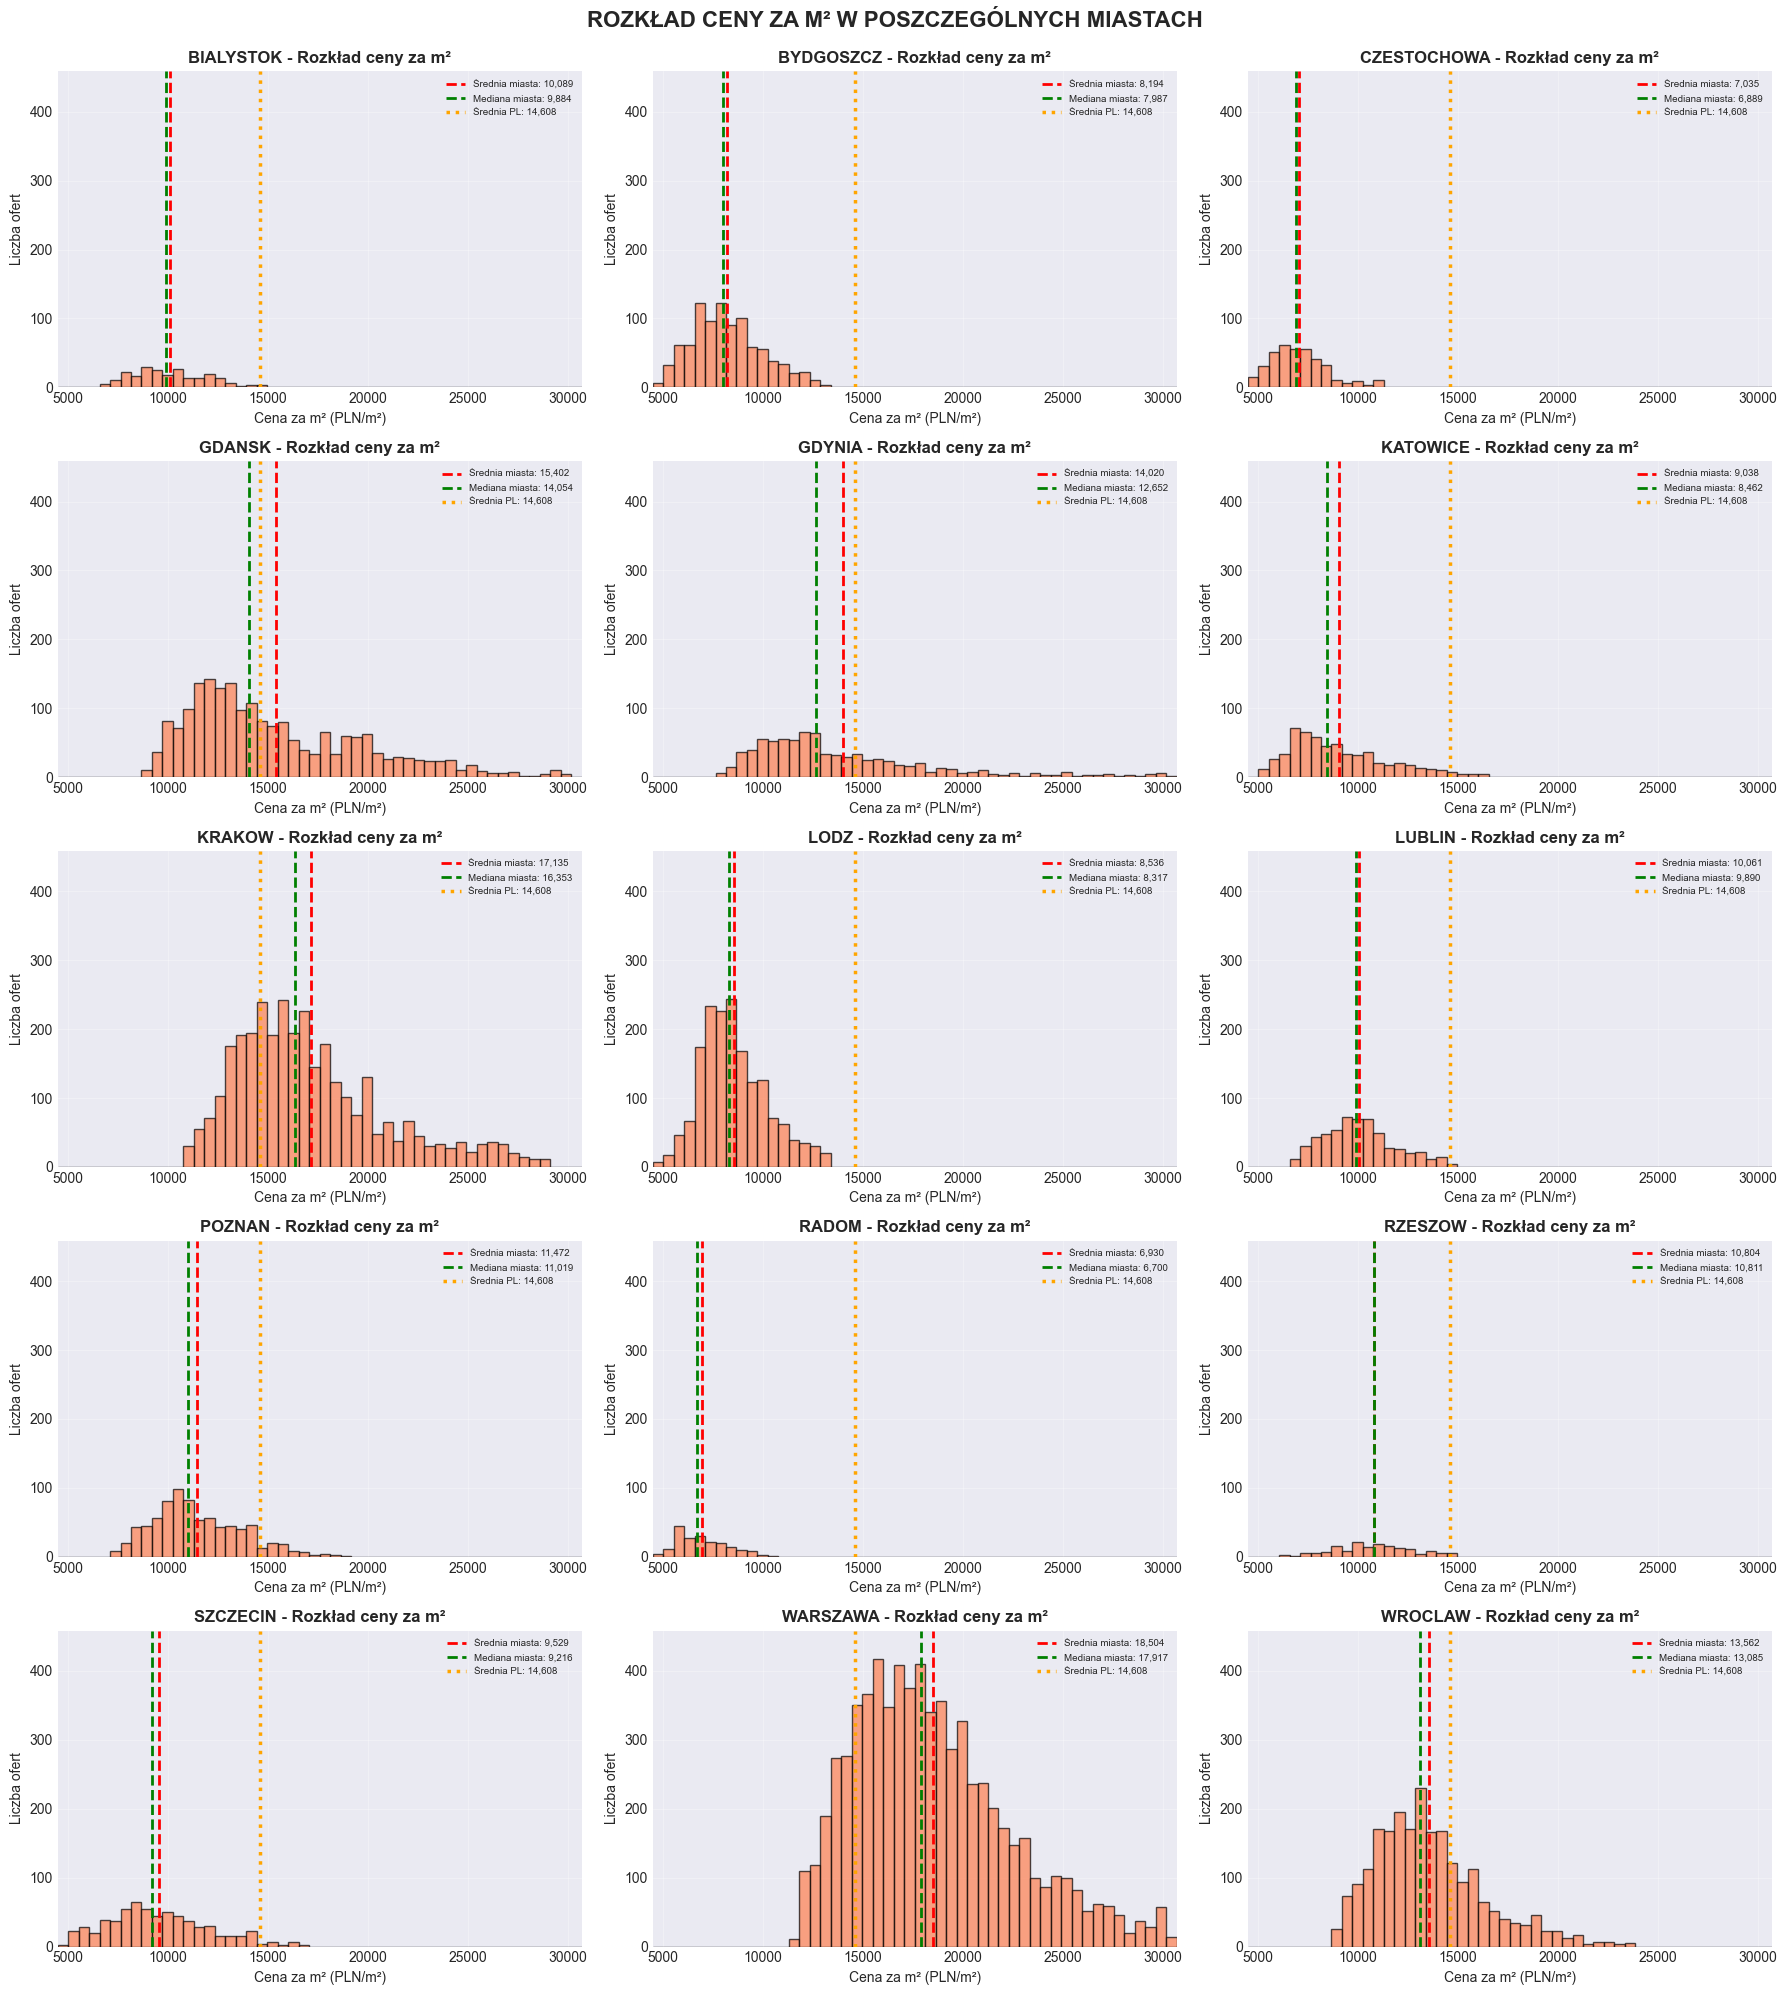

✅ Histogramy cen za m² dla wszystkich miast wygenerowane!


In [34]:
# ========================================
# CZĘŚĆ 2b: ANALIZA CENY ZA M² - HISTOGRAMY
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns

# Lista wszystkich miast
cities = df['city'].unique()
n_cities = len(cities)

# ========================================
# CZĘŚĆ 2b: ANALIZA CENY ZA M² - HISTOGRAMY
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lista wszystkich miast
cities = df['city'].unique()
n_cities = len(cities)

# ========================================
# 2.2 HISTOGRAMY CENY ZA M² - KAŻDE MIASTO OSOBNO
# ========================================

# Obliczamy globalną średnią dla wszystkich miast
global_mean_m2 = df['price_per_m2'].mean()
global_median_m2 = df['price_per_m2'].median()

# Ustalamy wspólną skalę osi X i Y
x_min, x_max = df['price_per_m2'].min(), df['price_per_m2'].max()

fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.flatten()

# Najpierw liczymy maksymalną liczbę ofert dla ujednolicenia osi Y
max_count = 0
for city in cities:
    city_data = df[df['city'] == city]['price_per_m2']
    counts, _ = np.histogram(city_data, bins=50, range=(x_min, x_max))
    max_count = max(max_count, counts.max())

for idx, city in enumerate(sorted(cities)):
    city_data = df[df['city'] == city]['price_per_m2']
    
    axes[idx].hist(city_data, bins=50, range=(x_min, x_max), edgecolor='black', alpha=0.7, color='coral')
    axes[idx].set_title(f'{city.upper()} - Rozkład ceny za m²', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Cena za m² (PLN/m²)', fontsize=10)
    axes[idx].set_ylabel('Liczba ofert', fontsize=10)
    
    # Ustawiamy wspólną skalę
    axes[idx].set_xlim(x_min, x_max)
    axes[idx].set_ylim(0, max_count * 1.1)
    
    # Dodajemy statystyki dla danego miasta
    mean_price = city_data.mean()
    median_price = city_data.median()
    
    axes[idx].axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Średnia miasta: {mean_price:,.0f}')
    axes[idx].axvline(median_price, color='green', linestyle='--', linewidth=2, label=f'Mediana miasta: {median_price:,.0f}')
    
    # Dodajemy globalną średnią wszystkich miast
    axes[idx].axvline(global_mean_m2, color='orange', linestyle=':', linewidth=2.5, label=f'Średnia PL: {global_mean_m2:,.0f}')
    
    axes[idx].legend(fontsize=7, loc='upper right')
    axes[idx].grid(True, alpha=0.3)

# Ukrywamy puste subploty
for idx in range(n_cities, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('ROZKŁAD CENY ZA M² W POSZCZEGÓLNYCH MIASTACH', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✅ Histogramy cen za m² dla wszystkich miast wygenerowane!")
print("="*60)

C:\Users\levia\AppData\Local\Temp\ipykernel_15184\4102321475.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='city', y='price', order=sorted_cities, palette='Set2')


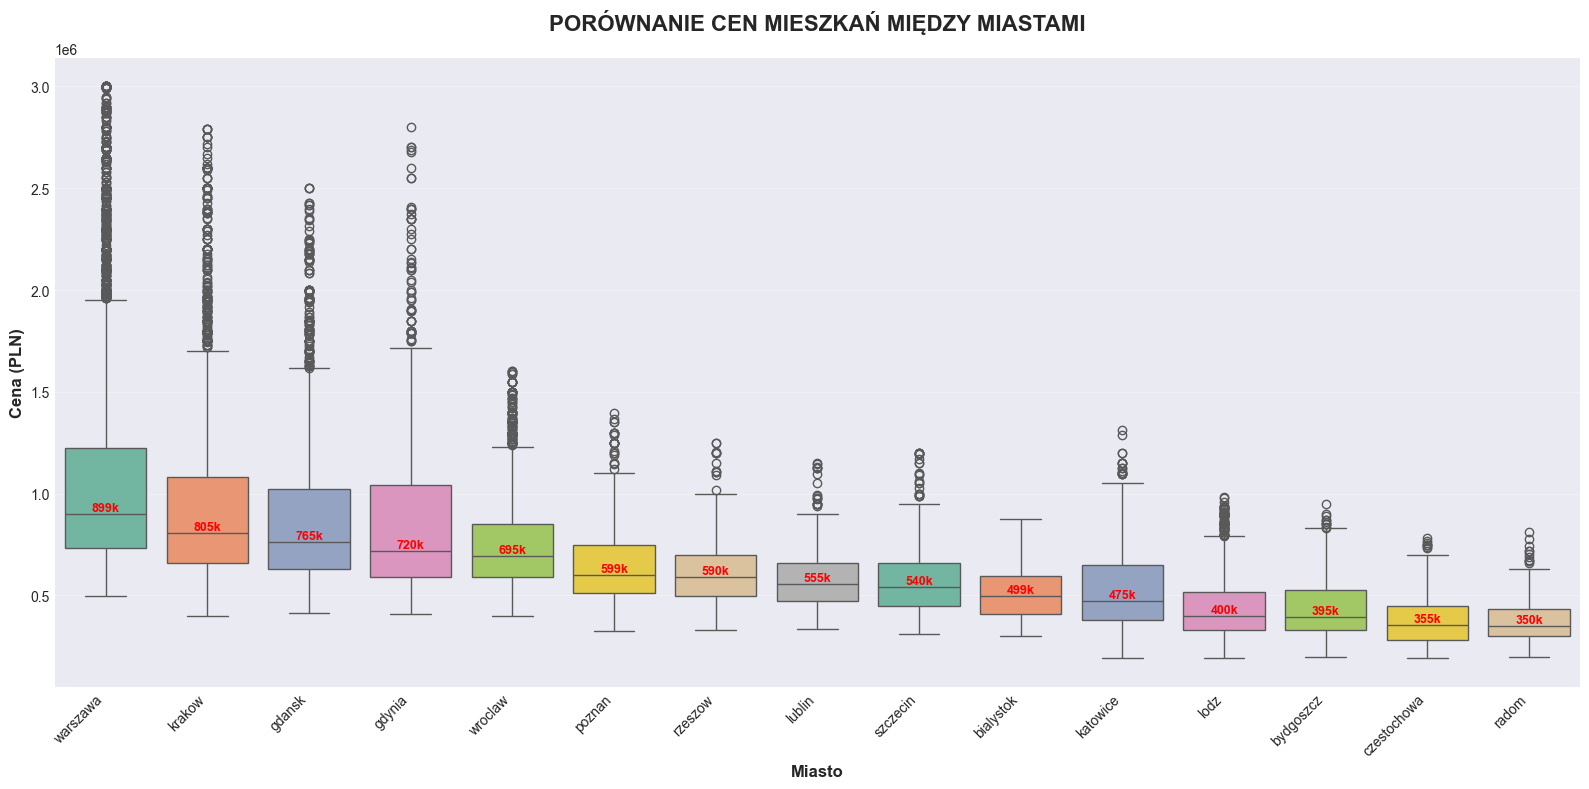

STATYSTYKI CEN PO MIASTACH
               Średnia   Mediana     Min      Max  Odch. std.
city                                                         
warszawa     1053134.0  899000.0  499000  3000000    468091.0
krakow        942169.0  805000.0  399000  2790000    425023.0
gdansk        891338.0  765000.0  415000  2499000    390898.0
gdynia        884685.0  720000.0  409000  2800000    449348.0
wroclaw       745965.0  695000.0  399000  1600000    231863.0
poznan        647102.0  599000.0  325000  1395000    200509.0
rzeszow       636871.0  590000.0  330000  1250000    199785.0
lublin        581739.0  554700.0  335000  1149990    151530.0
szczecin      572549.0  540000.0  309000  1200000    173852.0
bialystok     511691.0  498900.0  299000   875000    129829.0
katowice      528240.0  475000.0  195000  1315000    214606.0
lodz          442187.0  400000.0  191000   986000    156476.0
bydgoszcz     433865.0  395000.0  199999   949000    147926.0
czestochowa   380797.0  355000.0  195000   

In [33]:
# ========================================
# CZĘŚĆ 3: PORÓWNANIE CEN MIĘDZY MIASTAMI - BOXPLOTY
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ========================================
# 3.1 BOXPLOT - PORÓWNANIE CEN MIĘDZY MIASTAMI
# ========================================

# Sortujemy miasta według mediany ceny
city_medians = df.groupby('city')['price'].median().sort_values(ascending=False)
sorted_cities = city_medians.index.tolist()

plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x='city', y='price', order=sorted_cities, palette='Set2')
plt.title('PORÓWNANIE CEN MIESZKAŃ MIĘDZY MIASTAMI', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Miasto', fontsize=12, fontweight='bold')
plt.ylabel('Cena (PLN)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Dodajemy medianę na wykresie
for i, city in enumerate(sorted_cities):
    median_val = city_medians[city]
    plt.text(i, median_val, f'{median_val/1000:.0f}k', 
             ha='center', va='bottom', fontsize=9, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

# Wyświetlamy statystyki
print("="*60)
print("STATYSTYKI CEN PO MIASTACH")
print("="*60)

price_stats = df.groupby('city')['price'].agg([
    ('Średnia', 'mean'),
    ('Mediana', 'median'),
    ('Min', 'min'),
    ('Max', 'max'),
    ('Odch. std.', 'std')
]).round(0)

price_stats = price_stats.sort_values('Mediana', ascending=False)
print(price_stats)

print("\n✅ Boxplot porównawczy cen wygenerowany!")
print("="*60)

C:\Users\levia\AppData\Local\Temp\ipykernel_15184\4058742192.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='city', y='price_per_m2', order=sorted_cities_m2, palette='Set3')


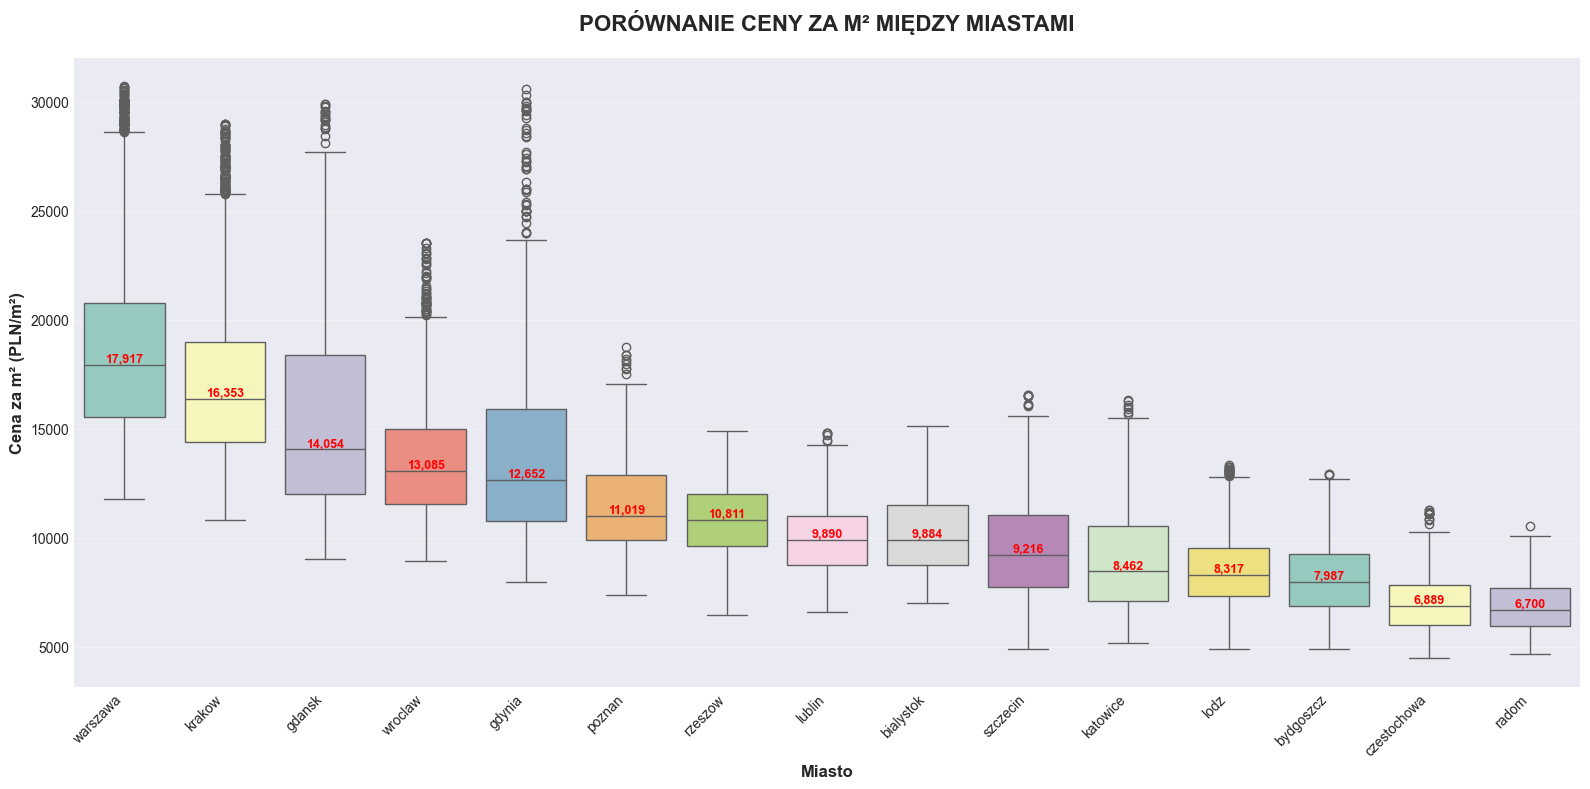

STATYSTYKI CENY ZA M² PO MIASTACH
             Średnia  Mediana      Min      Max  Odch. std.
city                                                       
warszawa     18504.0  17917.0  11760.0  30703.0      3926.0
krakow       17135.0  16353.0  10833.0  29000.0      3789.0
gdansk       15402.0  14054.0   9036.0  29893.0      4374.0
wroclaw      13562.0  13085.0   8925.0  23500.0      2742.0
gdynia       14020.0  12652.0   7990.0  30571.0      4657.0
poznan       11472.0  11019.0   7403.0  18750.0      2210.0
rzeszow      10804.0  10811.0   6476.0  14912.0      1882.0
lublin       10061.0   9890.0   6611.0  14803.0      1780.0
bialystok    10089.0   9884.0   6991.0  15149.0      1838.0
szczecin      9529.0   9216.0   4927.0  16542.0      2515.0
katowice      9038.0   8462.0   5190.0  16324.0      2461.0
lodz          8536.0   8317.0   4906.0  13328.0      1653.0
bydgoszcz     8194.0   7987.0   4883.0  12940.0      1736.0
czestochowa   7035.0   6889.0   4472.0  11264.0      1403.0
radom 

In [32]:
# ========================================
# CZĘŚĆ 3b: PORÓWNANIE CENY ZA M² MIĘDZY MIASTAMI
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns

# Sortujemy miasta według mediany ceny za m²
city_medians_m2 = df.groupby('city')['price_per_m2'].median().sort_values(ascending=False)
sorted_cities_m2 = city_medians_m2.index.tolist()

plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x='city', y='price_per_m2', order=sorted_cities_m2, palette='Set3')
plt.title('PORÓWNANIE CENY ZA M² MIĘDZY MIASTAMI', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Miasto', fontsize=12, fontweight='bold')
plt.ylabel('Cena za m² (PLN/m²)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Dodajemy medianę na wykresie
for i, city in enumerate(sorted_cities_m2):
    median_val = city_medians_m2[city]
    plt.text(i, median_val, f'{median_val:,.0f}', 
             ha='center', va='bottom', fontsize=9, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

# Wyświetlamy statystyki
print("="*60)
print("STATYSTYKI CENY ZA M² PO MIASTACH")
print("="*60)

price_m2_stats = df.groupby('city')['price_per_m2'].agg([
    ('Średnia', 'mean'),
    ('Mediana', 'median'),
    ('Min', 'min'),
    ('Max', 'max'),
    ('Odch. std.', 'std')
]).round(0)

price_m2_stats = price_m2_stats.sort_values('Mediana', ascending=False)
print(price_m2_stats)

print("\n✅ Boxplot porównawczy ceny za m² wygenerowany!")
print("="*60)

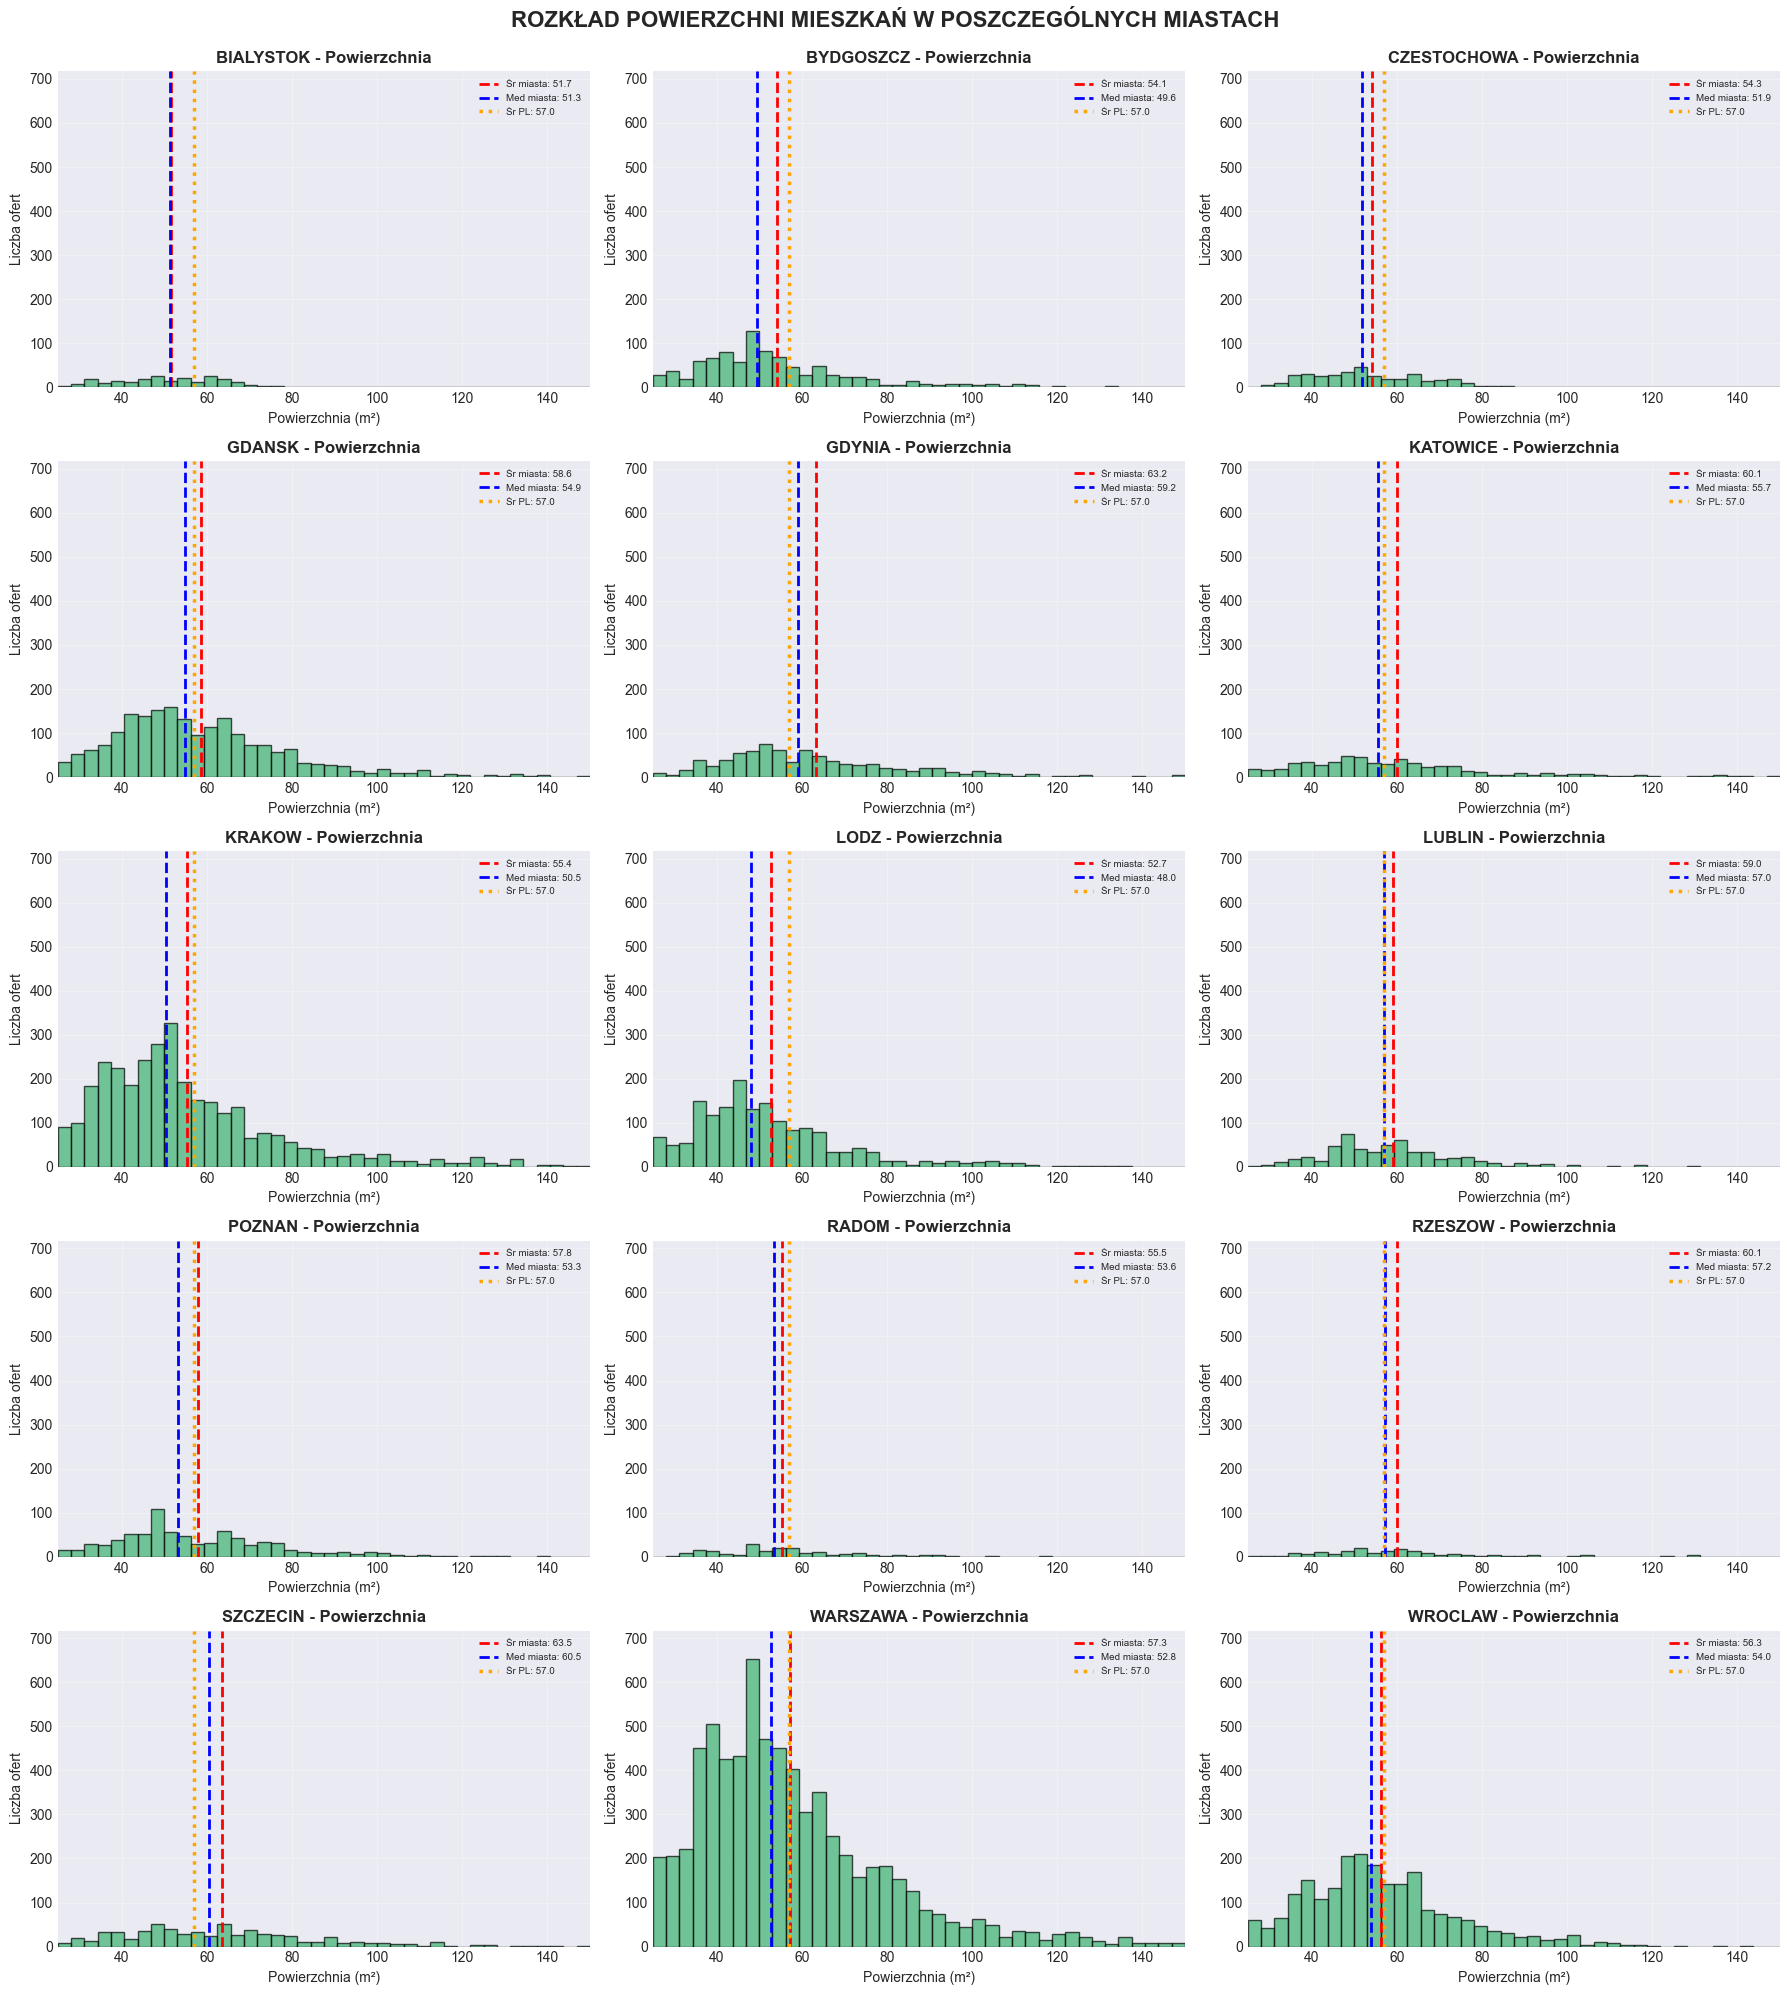

✅ Histogramy powierzchni wygenerowane!


In [31]:
# ========================================
# CZĘŚĆ 4: HISTOGRAMY POZOSTAŁYCH ZMIENNYCH
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns

cities = sorted(df['city'].unique())
n_cities = len(cities)

# ========================================
# CZĘŚĆ 4: HISTOGRAMY POZOSTAŁYCH ZMIENNYCH
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cities = sorted(df['city'].unique())
n_cities = len(cities)

# ========================================
# 4.1 POWIERZCHNIA (squareMeters)
# ========================================

# Obliczamy globalną średnią
global_mean_sqm = df['squareMeters'].mean()
global_median_sqm = df['squareMeters'].median()

# Ustalamy wspólną skalę
x_min, x_max = df['squareMeters'].min(), df['squareMeters'].max()

fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.flatten()

# Liczymy maksymalną liczbę dla osi Y
max_count = 0
for city in cities:
    city_data = df[df['city'] == city]['squareMeters']
    counts, _ = np.histogram(city_data, bins=40, range=(x_min, x_max))
    max_count = max(max_count, counts.max())

for idx, city in enumerate(cities):
    city_data = df[df['city'] == city]['squareMeters']
    
    axes[idx].hist(city_data, bins=40, range=(x_min, x_max), edgecolor='black', alpha=0.7, color='mediumseagreen')
    axes[idx].set_title(f'{city.upper()} - Powierzchnia', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Powierzchnia (m²)', fontsize=10)
    axes[idx].set_ylabel('Liczba ofert', fontsize=10)
    
    # Wspólna skala
    axes[idx].set_xlim(x_min, x_max)
    axes[idx].set_ylim(0, max_count * 1.1)
    
    mean_val = city_data.mean()
    median_val = city_data.median()
    
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Śr miasta: {mean_val:.1f}')
    axes[idx].axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f'Med miasta: {median_val:.1f}')
    axes[idx].axvline(global_mean_sqm, color='orange', linestyle=':', linewidth=2.5, label=f'Śr PL: {global_mean_sqm:.1f}')
    
    axes[idx].legend(fontsize=7, loc='upper right')
    axes[idx].grid(True, alpha=0.3)

for idx in range(n_cities, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('ROZKŁAD POWIERZCHNI MIESZKAŃ W POSZCZEGÓLNYCH MIASTACH', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✅ Histogramy powierzchni wygenerowane!")
print("="*60)

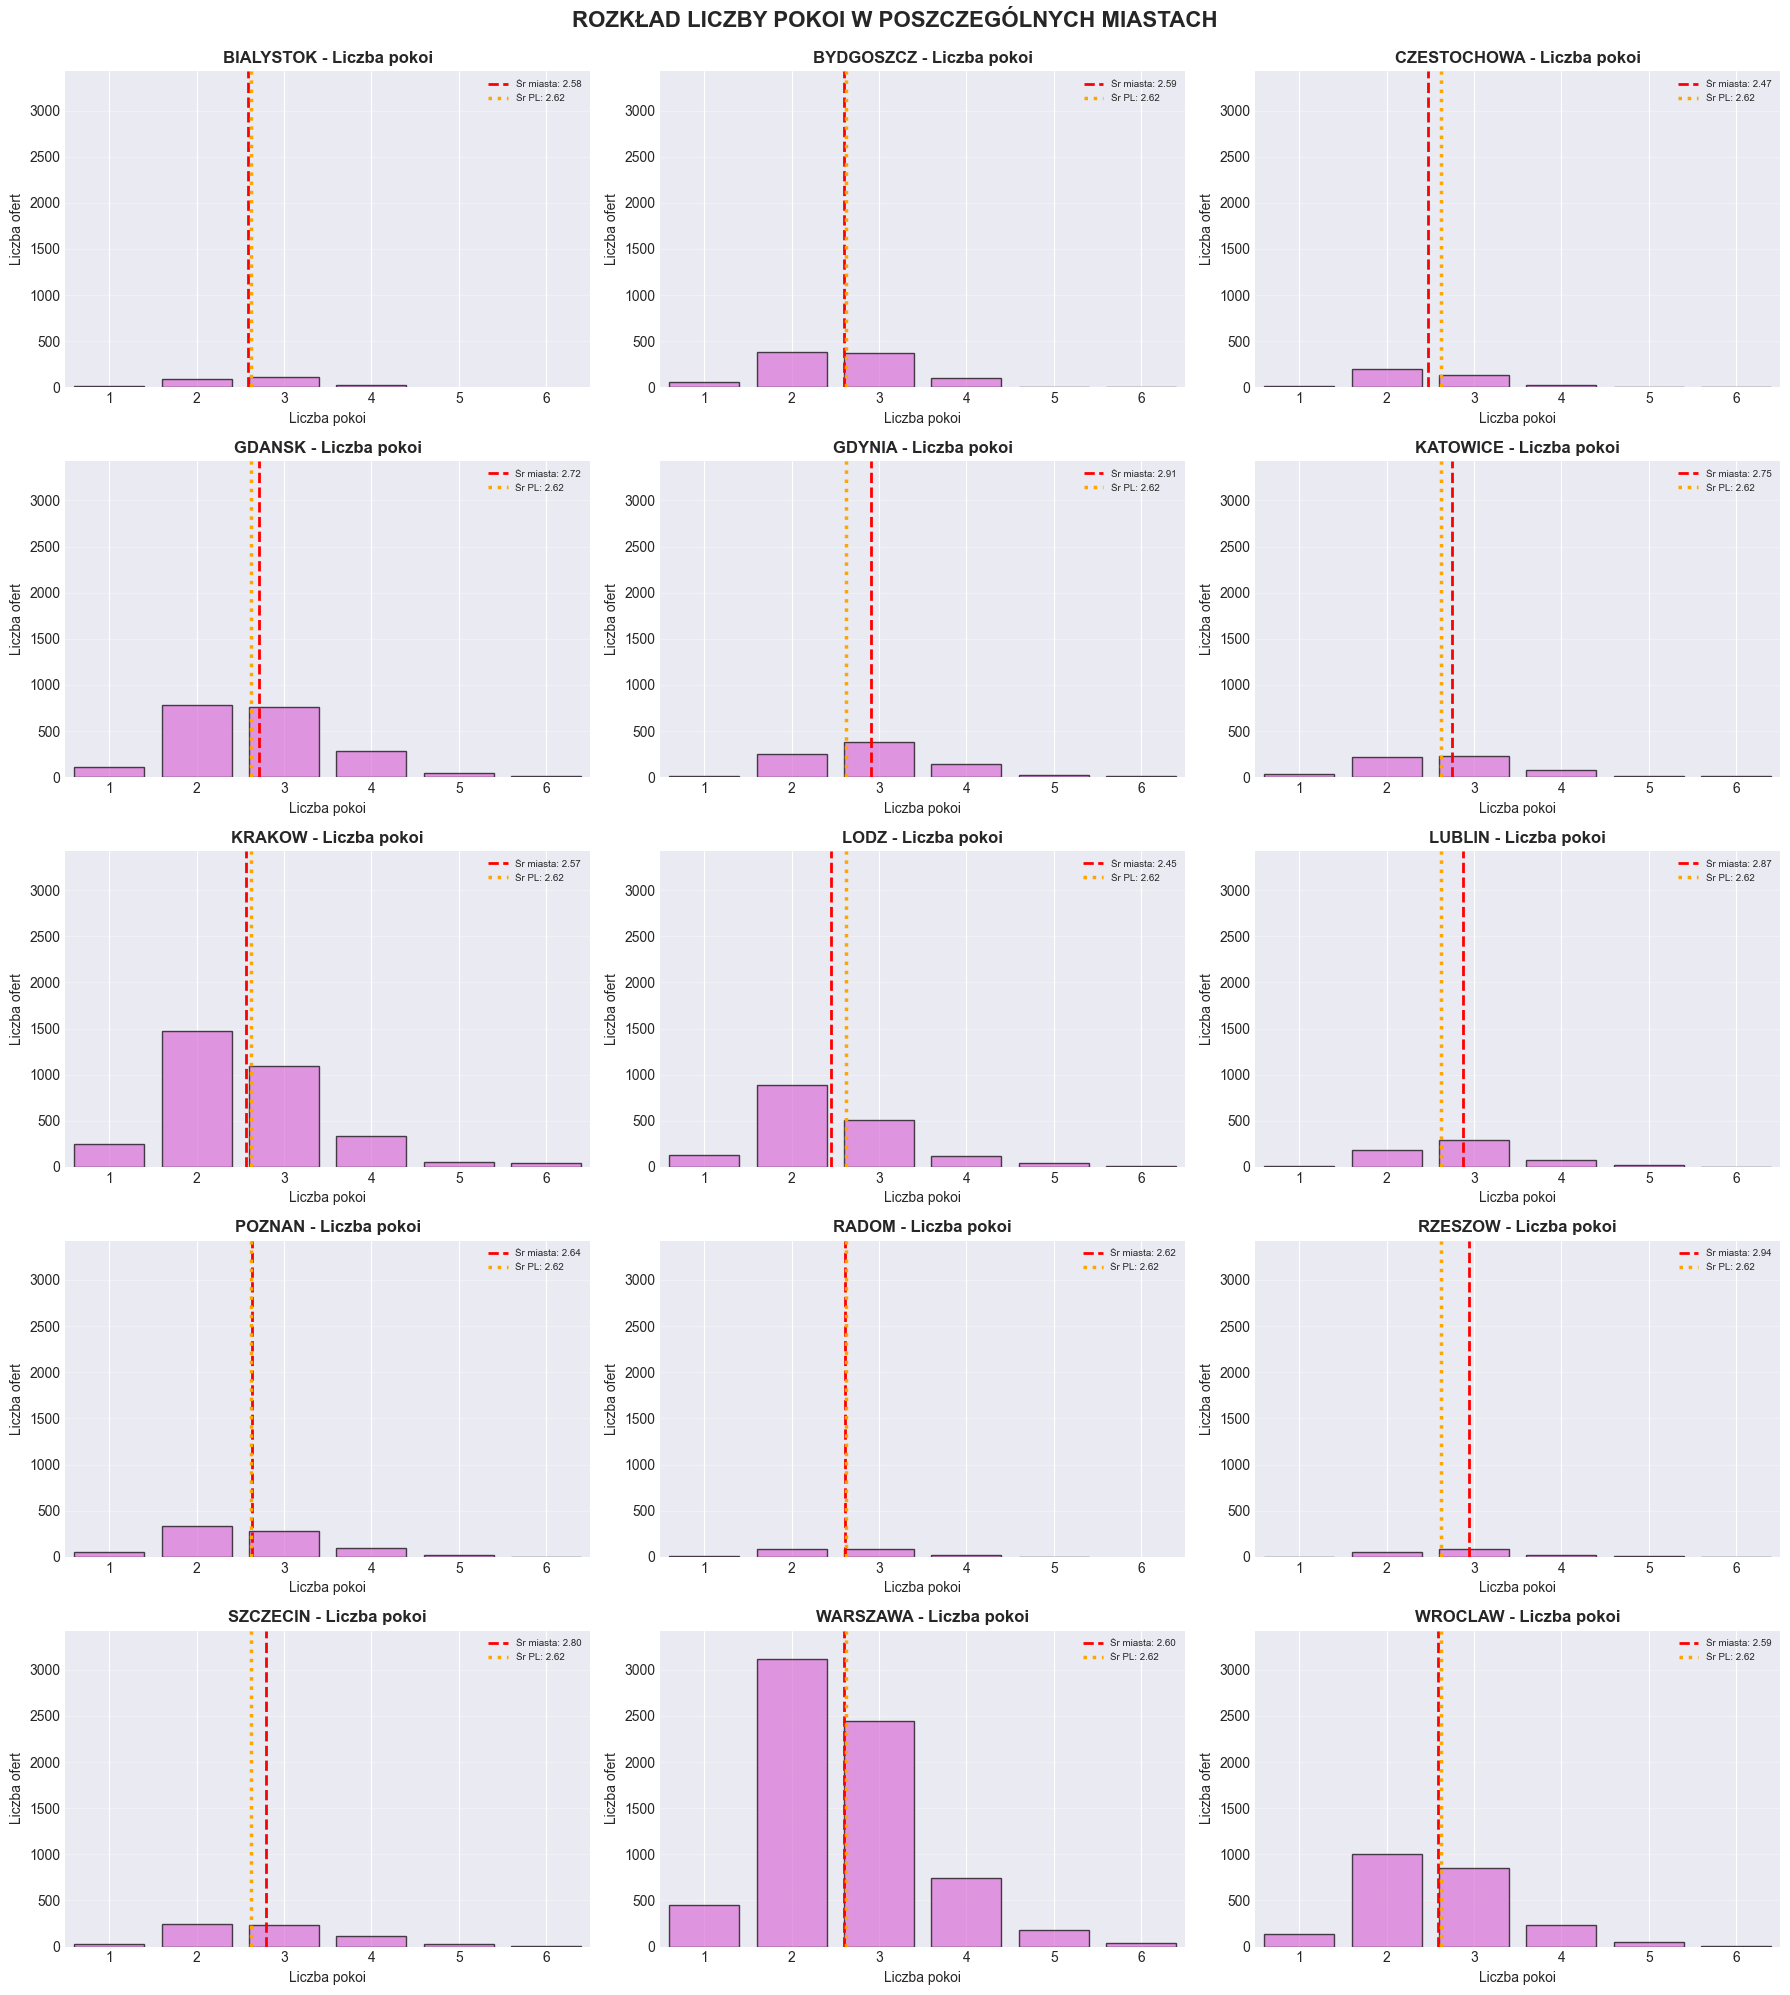

✅ Histogramy liczby pokoi wygenerowane!


In [30]:
# ========================================
# CZĘŚĆ 4b: LICZBA POKOI (rooms)
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cities = sorted(df['city'].unique())
n_cities = len(cities)

# Obliczamy globalną średnią
global_mean_rooms = df['rooms'].mean()

fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.flatten()

# Ustalamy wspólny zakres dla osi X i Y
all_rooms = df['rooms'].unique()
x_min, x_max = df['rooms'].min(), df['rooms'].max()

# Liczymy maksymalną liczbę dla osi Y
max_count = 0
for city in cities:
    city_data = df[df['city'] == city]['rooms']
    room_counts = city_data.value_counts()
    max_count = max(max_count, room_counts.max())

for idx, city in enumerate(cities):
    city_data = df[df['city'] == city]['rooms']
    
    # Zliczamy liczbę pokoi
    room_counts = city_data.value_counts().sort_index()
    
    axes[idx].bar(room_counts.index, room_counts.values, edgecolor='black', alpha=0.7, color='orchid')
    axes[idx].set_title(f'{city.upper()} - Liczba pokoi', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Liczba pokoi', fontsize=10)
    axes[idx].set_ylabel('Liczba ofert', fontsize=10)
    
    # Wspólna skala
    axes[idx].set_xlim(x_min - 0.5, x_max + 0.5)
    axes[idx].set_ylim(0, max_count * 1.1)
    axes[idx].set_xticks(range(int(x_min), int(x_max) + 1))
    
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Dodajemy średnie
    mean_val = city_data.mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Śr miasta: {mean_val:.2f}')
    axes[idx].axvline(global_mean_rooms, color='orange', linestyle=':', linewidth=2.5, label=f'Śr PL: {global_mean_rooms:.2f}')
    
    axes[idx].legend(fontsize=7, loc='upper right')

for idx in range(n_cities, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('ROZKŁAD LICZBY POKOI W POSZCZEGÓLNYCH MIASTACH', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✅ Histogramy liczby pokoi wygenerowane!")
print("="*60)

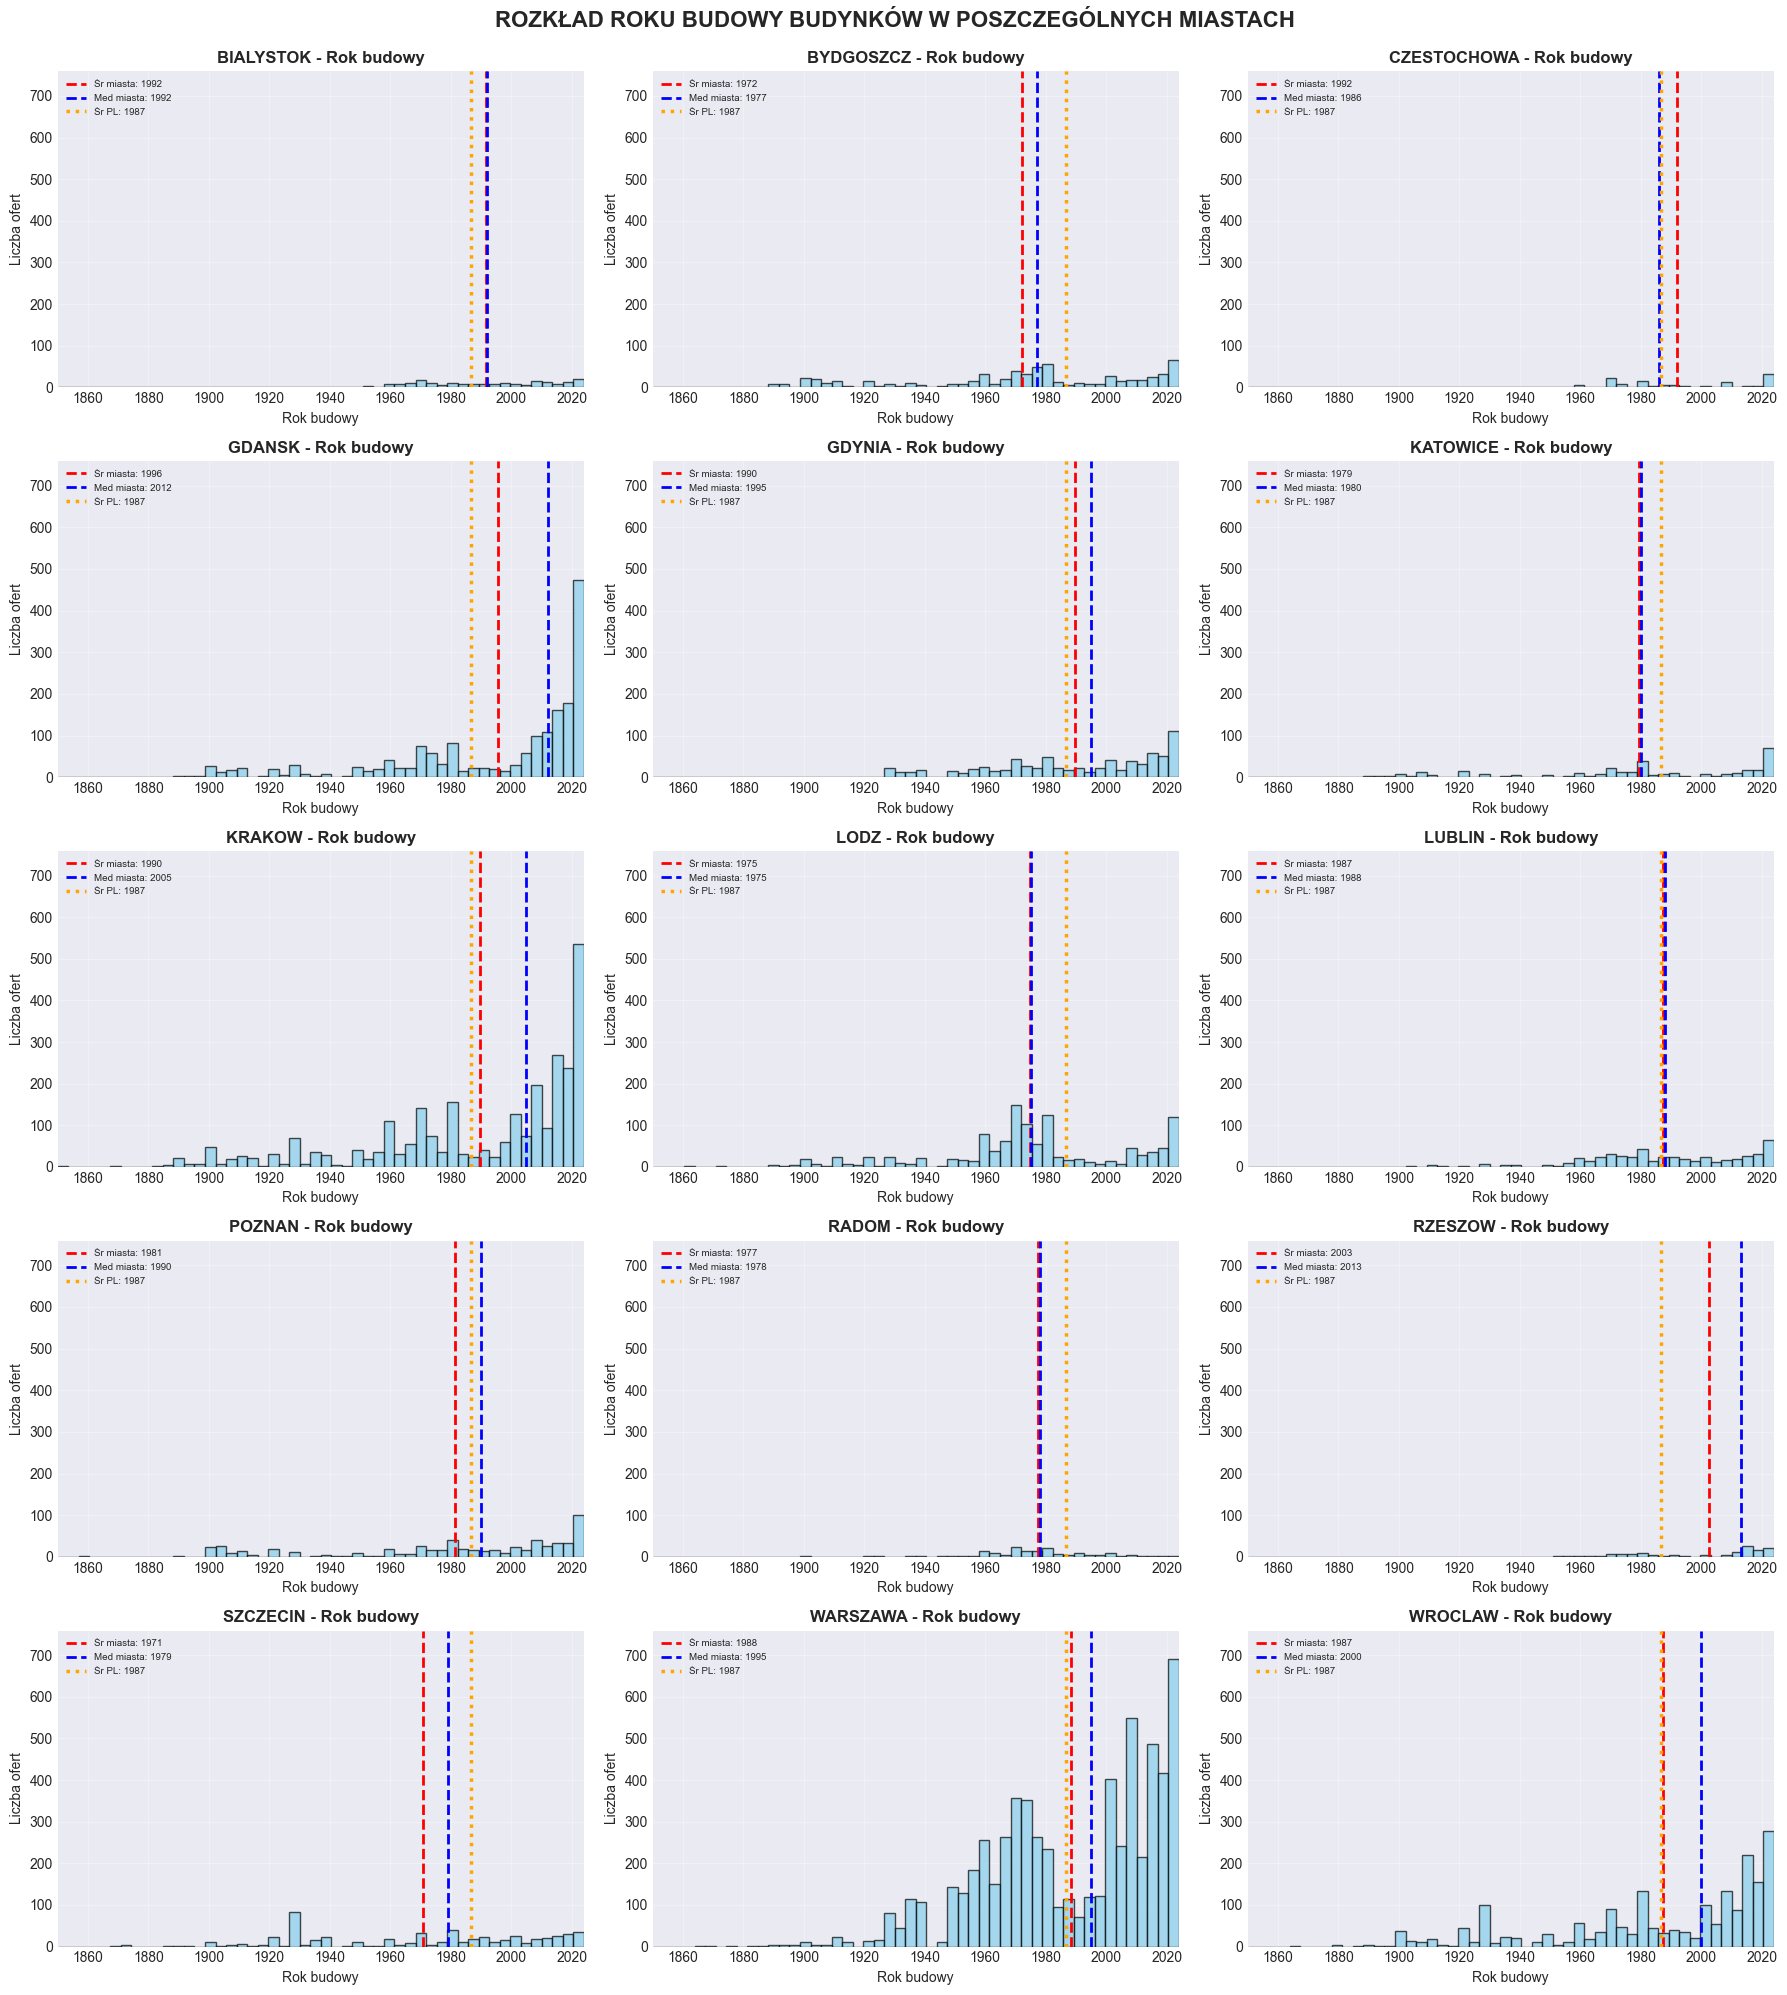

✅ Histogramy roku budowy wygenerowane!


In [29]:
# ========================================
# CZĘŚĆ 4c: ROK BUDOWY (buildYear)
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cities = sorted(df['city'].unique())
n_cities = len(cities)

# Obliczamy globalną średnią
global_mean_year = df['buildYear'].mean()
global_median_year = df['buildYear'].median()

# Ustalamy wspólną skalę
x_min, x_max = df['buildYear'].min(), df['buildYear'].max()

fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.flatten()

# Liczymy maksymalną liczbę dla osi Y
max_count = 0
for city in cities:
    city_data = df[df['city'] == city]['buildYear']
    counts, _ = np.histogram(city_data, bins=50, range=(x_min, x_max))
    max_count = max(max_count, counts.max())

for idx, city in enumerate(cities):
    city_data = df[df['city'] == city]['buildYear']
    
    axes[idx].hist(city_data, bins=50, range=(x_min, x_max), edgecolor='black', alpha=0.7, color='skyblue')
    axes[idx].set_title(f'{city.upper()} - Rok budowy', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Rok budowy', fontsize=10)
    axes[idx].set_ylabel('Liczba ofert', fontsize=10)
    
    # Wspólna skala
    axes[idx].set_xlim(x_min, x_max)
    axes[idx].set_ylim(0, max_count * 1.1)
    
    mean_val = city_data.mean()
    median_val = city_data.median()
    
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Śr miasta: {mean_val:.0f}')
    axes[idx].axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f'Med miasta: {median_val:.0f}')
    axes[idx].axvline(global_mean_year, color='orange', linestyle=':', linewidth=2.5, label=f'Śr PL: {global_mean_year:.0f}')
    
    axes[idx].legend(fontsize=7, loc='upper left')
    axes[idx].grid(True, alpha=0.3)

for idx in range(n_cities, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('ROZKŁAD ROKU BUDOWY BUDYNKÓW W POSZCZEGÓLNYCH MIASTACH', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✅ Histogramy roku budowy wygenerowane!")
print("="*60)

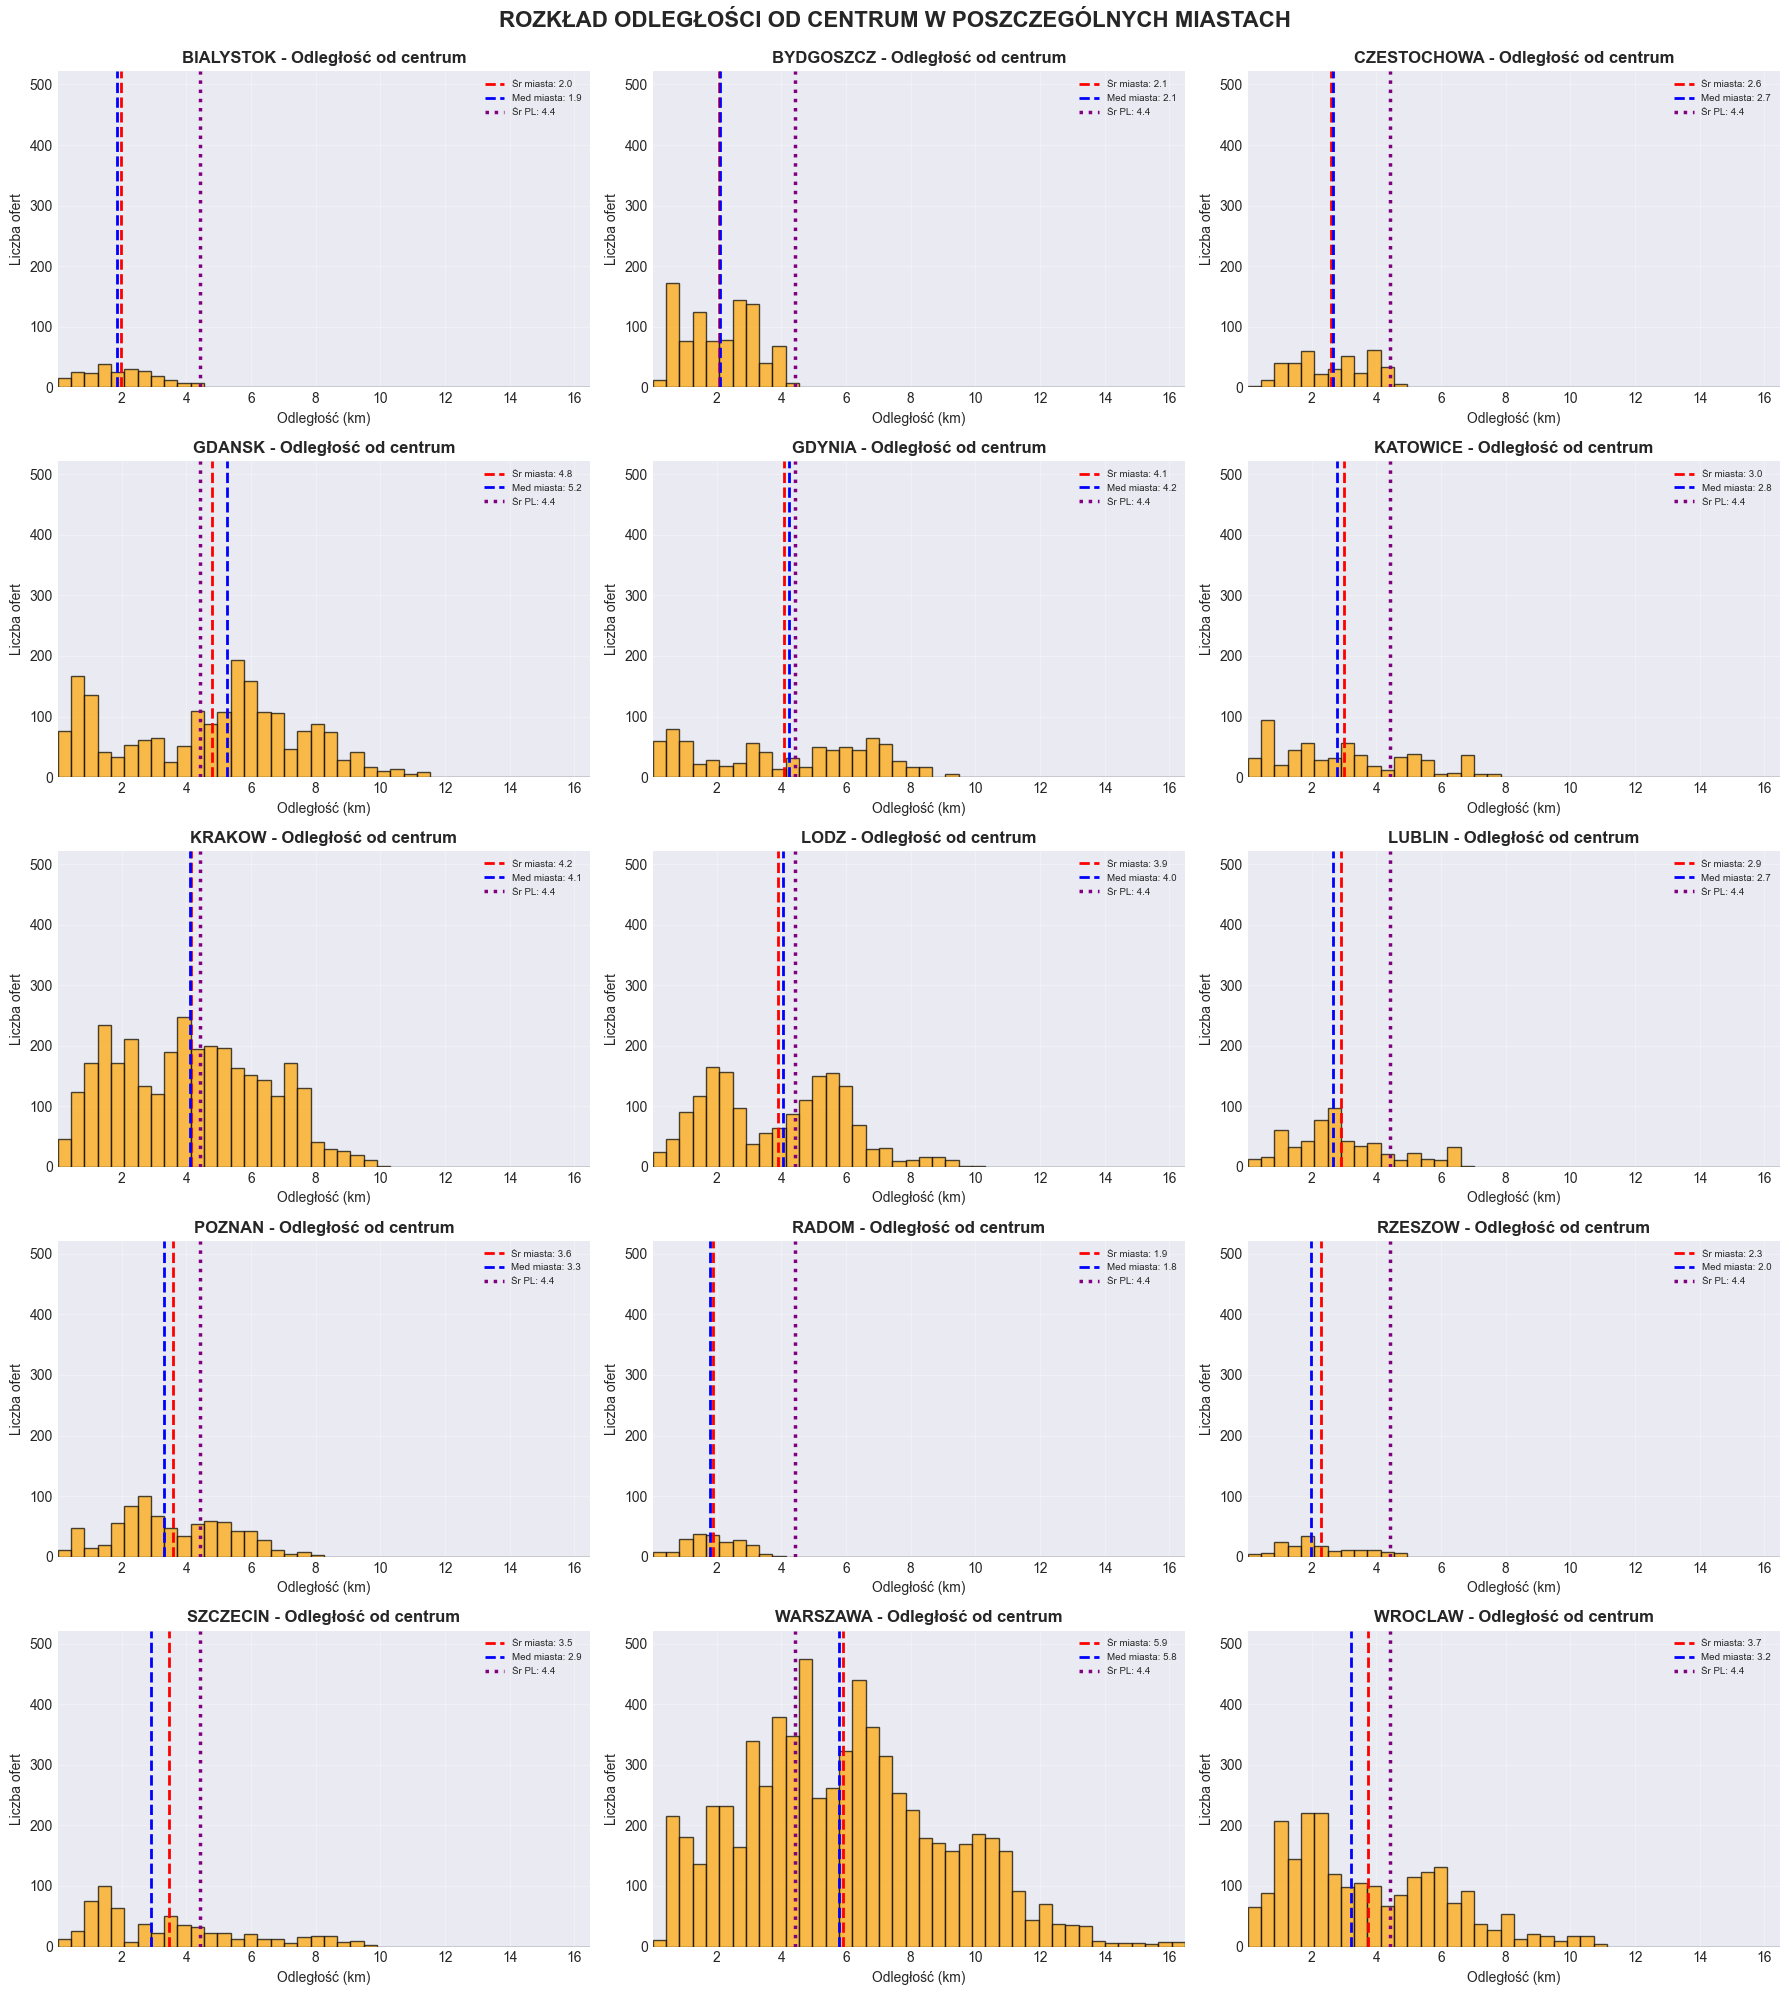

✅ Histogramy odległości od centrum wygenerowane!


In [28]:
# ========================================
# CZĘŚĆ 4d: ODLEGŁOŚĆ OD CENTRUM (centreDistance)
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cities = sorted(df['city'].unique())
n_cities = len(cities)

# Obliczamy globalną średnią
global_mean_distance = df['centreDistance'].mean()
global_median_distance = df['centreDistance'].median()

# Ustalamy wspólną skalę
x_min, x_max = df['centreDistance'].min(), df['centreDistance'].max()

fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.flatten()

# Liczymy maksymalną liczbę dla osi Y
max_count = 0
for city in cities:
    city_data = df[df['city'] == city]['centreDistance']
    counts, _ = np.histogram(city_data, bins=40, range=(x_min, x_max))
    max_count = max(max_count, counts.max())

for idx, city in enumerate(cities):
    city_data = df[df['city'] == city]['centreDistance']
    
    axes[idx].hist(city_data, bins=40, range=(x_min, x_max), edgecolor='black', alpha=0.7, color='orange')
    axes[idx].set_title(f'{city.upper()} - Odległość od centrum', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Odległość (km)', fontsize=10)
    axes[idx].set_ylabel('Liczba ofert', fontsize=10)
    
    # Wspólna skala
    axes[idx].set_xlim(x_min, x_max)
    axes[idx].set_ylim(0, max_count * 1.1)
    
    mean_val = city_data.mean()
    median_val = city_data.median()
    
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Śr miasta: {mean_val:.1f}')
    axes[idx].axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f'Med miasta: {median_val:.1f}')
    axes[idx].axvline(global_mean_distance, color='purple', linestyle=':', linewidth=2.5, label=f'Śr PL: {global_mean_distance:.1f}')
    
    axes[idx].legend(fontsize=7, loc='upper right')
    axes[idx].grid(True, alpha=0.3)

for idx in range(n_cities, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('ROZKŁAD ODLEGŁOŚCI OD CENTRUM W POSZCZEGÓLNYCH MIASTACH', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✅ Histogramy odległości od centrum wygenerowane!")
print("="*60)

C:\Users\levia\AppData\Local\Temp\ipykernel_15184\139178938.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rooms', y='price', palette='viridis')


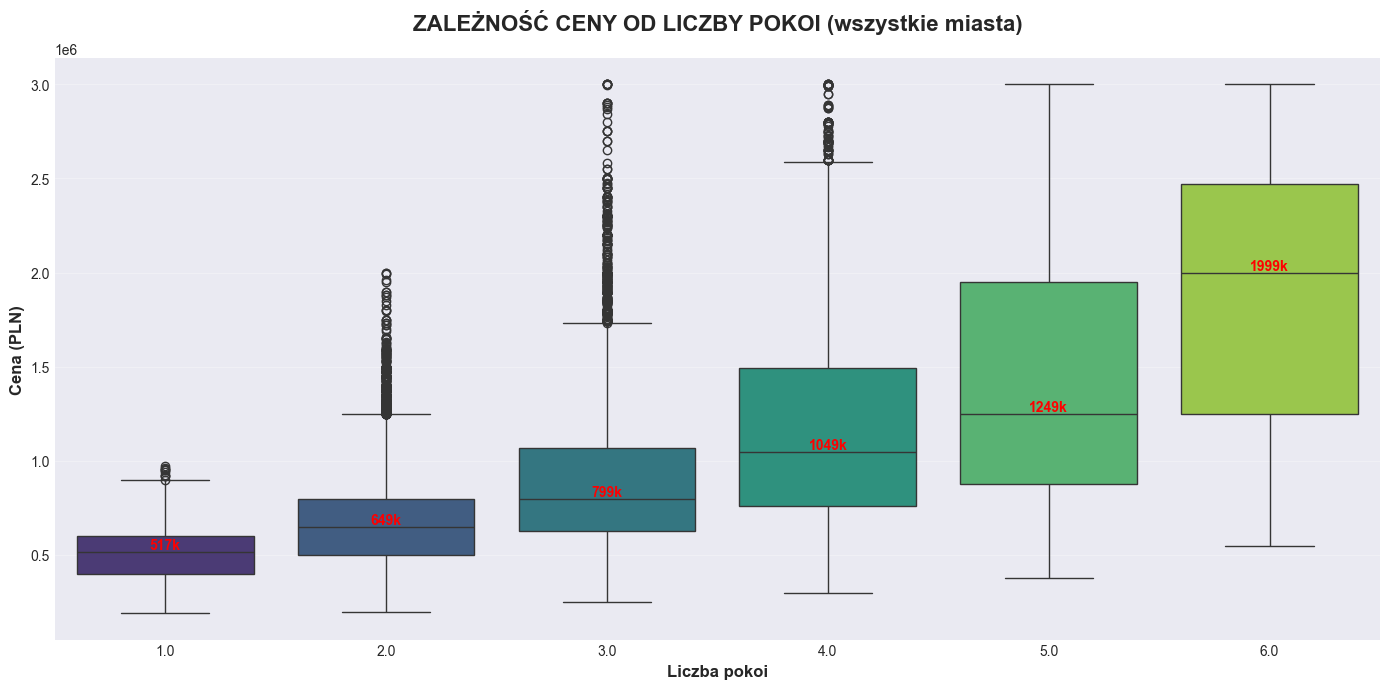

STATYSTYKI CENY WEDŁUG LICZBY POKOI
       Liczba ofert    Średnia    Mediana     Min      Max
rooms                                                     
1.0            1308   504602.0   517000.0  191000   970000
2.0            9310   671582.0   649000.0  195000  2000000
3.0            7842   890556.0   799000.0  249000  3000000
4.0            2404  1187753.0  1049000.0  299000  3000000
5.0             496  1410322.0  1249000.0  375000  2999000
6.0             141  1864664.0  1999000.0  550000  3000000

✅ Boxplot cena vs liczba pokoi wygenerowany!


In [27]:
# ========================================
# CZĘŚĆ 5: CENA VS LICZBA POKOI
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ========================================
# 5.1 BOXPLOT - CENA VS LICZBA POKOI (wszystkie miasta razem)
# ========================================

plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='rooms', y='price', palette='viridis')
plt.title('ZALEŻNOŚĆ CENY OD LICZBY POKOI (wszystkie miasta)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Liczba pokoi', fontsize=12, fontweight='bold')
plt.ylabel('Cena (PLN)', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Dodajemy mediany
room_medians = df.groupby('rooms')['price'].median()
for i, room in enumerate(sorted(df['rooms'].unique())):
    median_val = room_medians[room]
    plt.text(i, median_val, f'{median_val/1000:.0f}k', 
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

# Statystyki
print("="*60)
print("STATYSTYKI CENY WEDŁUG LICZBY POKOI")
print("="*60)

room_stats = df.groupby('rooms')['price'].agg([
    ('Liczba ofert', 'count'),
    ('Średnia', 'mean'),
    ('Mediana', 'median'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(0)

print(room_stats)

print("\n✅ Boxplot cena vs liczba pokoi wygenerowany!")
print("="*60)

C:\Users\levia\AppData\Local\Temp\ipykernel_15184\3175875580.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=city_data, x='rooms', y='price', ax=axes[idx], palette='Set2')
C:\Users\levia\AppData\Local\Temp\ipykernel_15184\3175875580.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=city_data, x='rooms', y='price', ax=axes[idx], palette='Set2')
C:\Users\levia\AppData\Local\Temp\ipykernel_15184\3175875580.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=city_data, x='rooms', y='price', ax=axes[idx], palette='Set2')
C

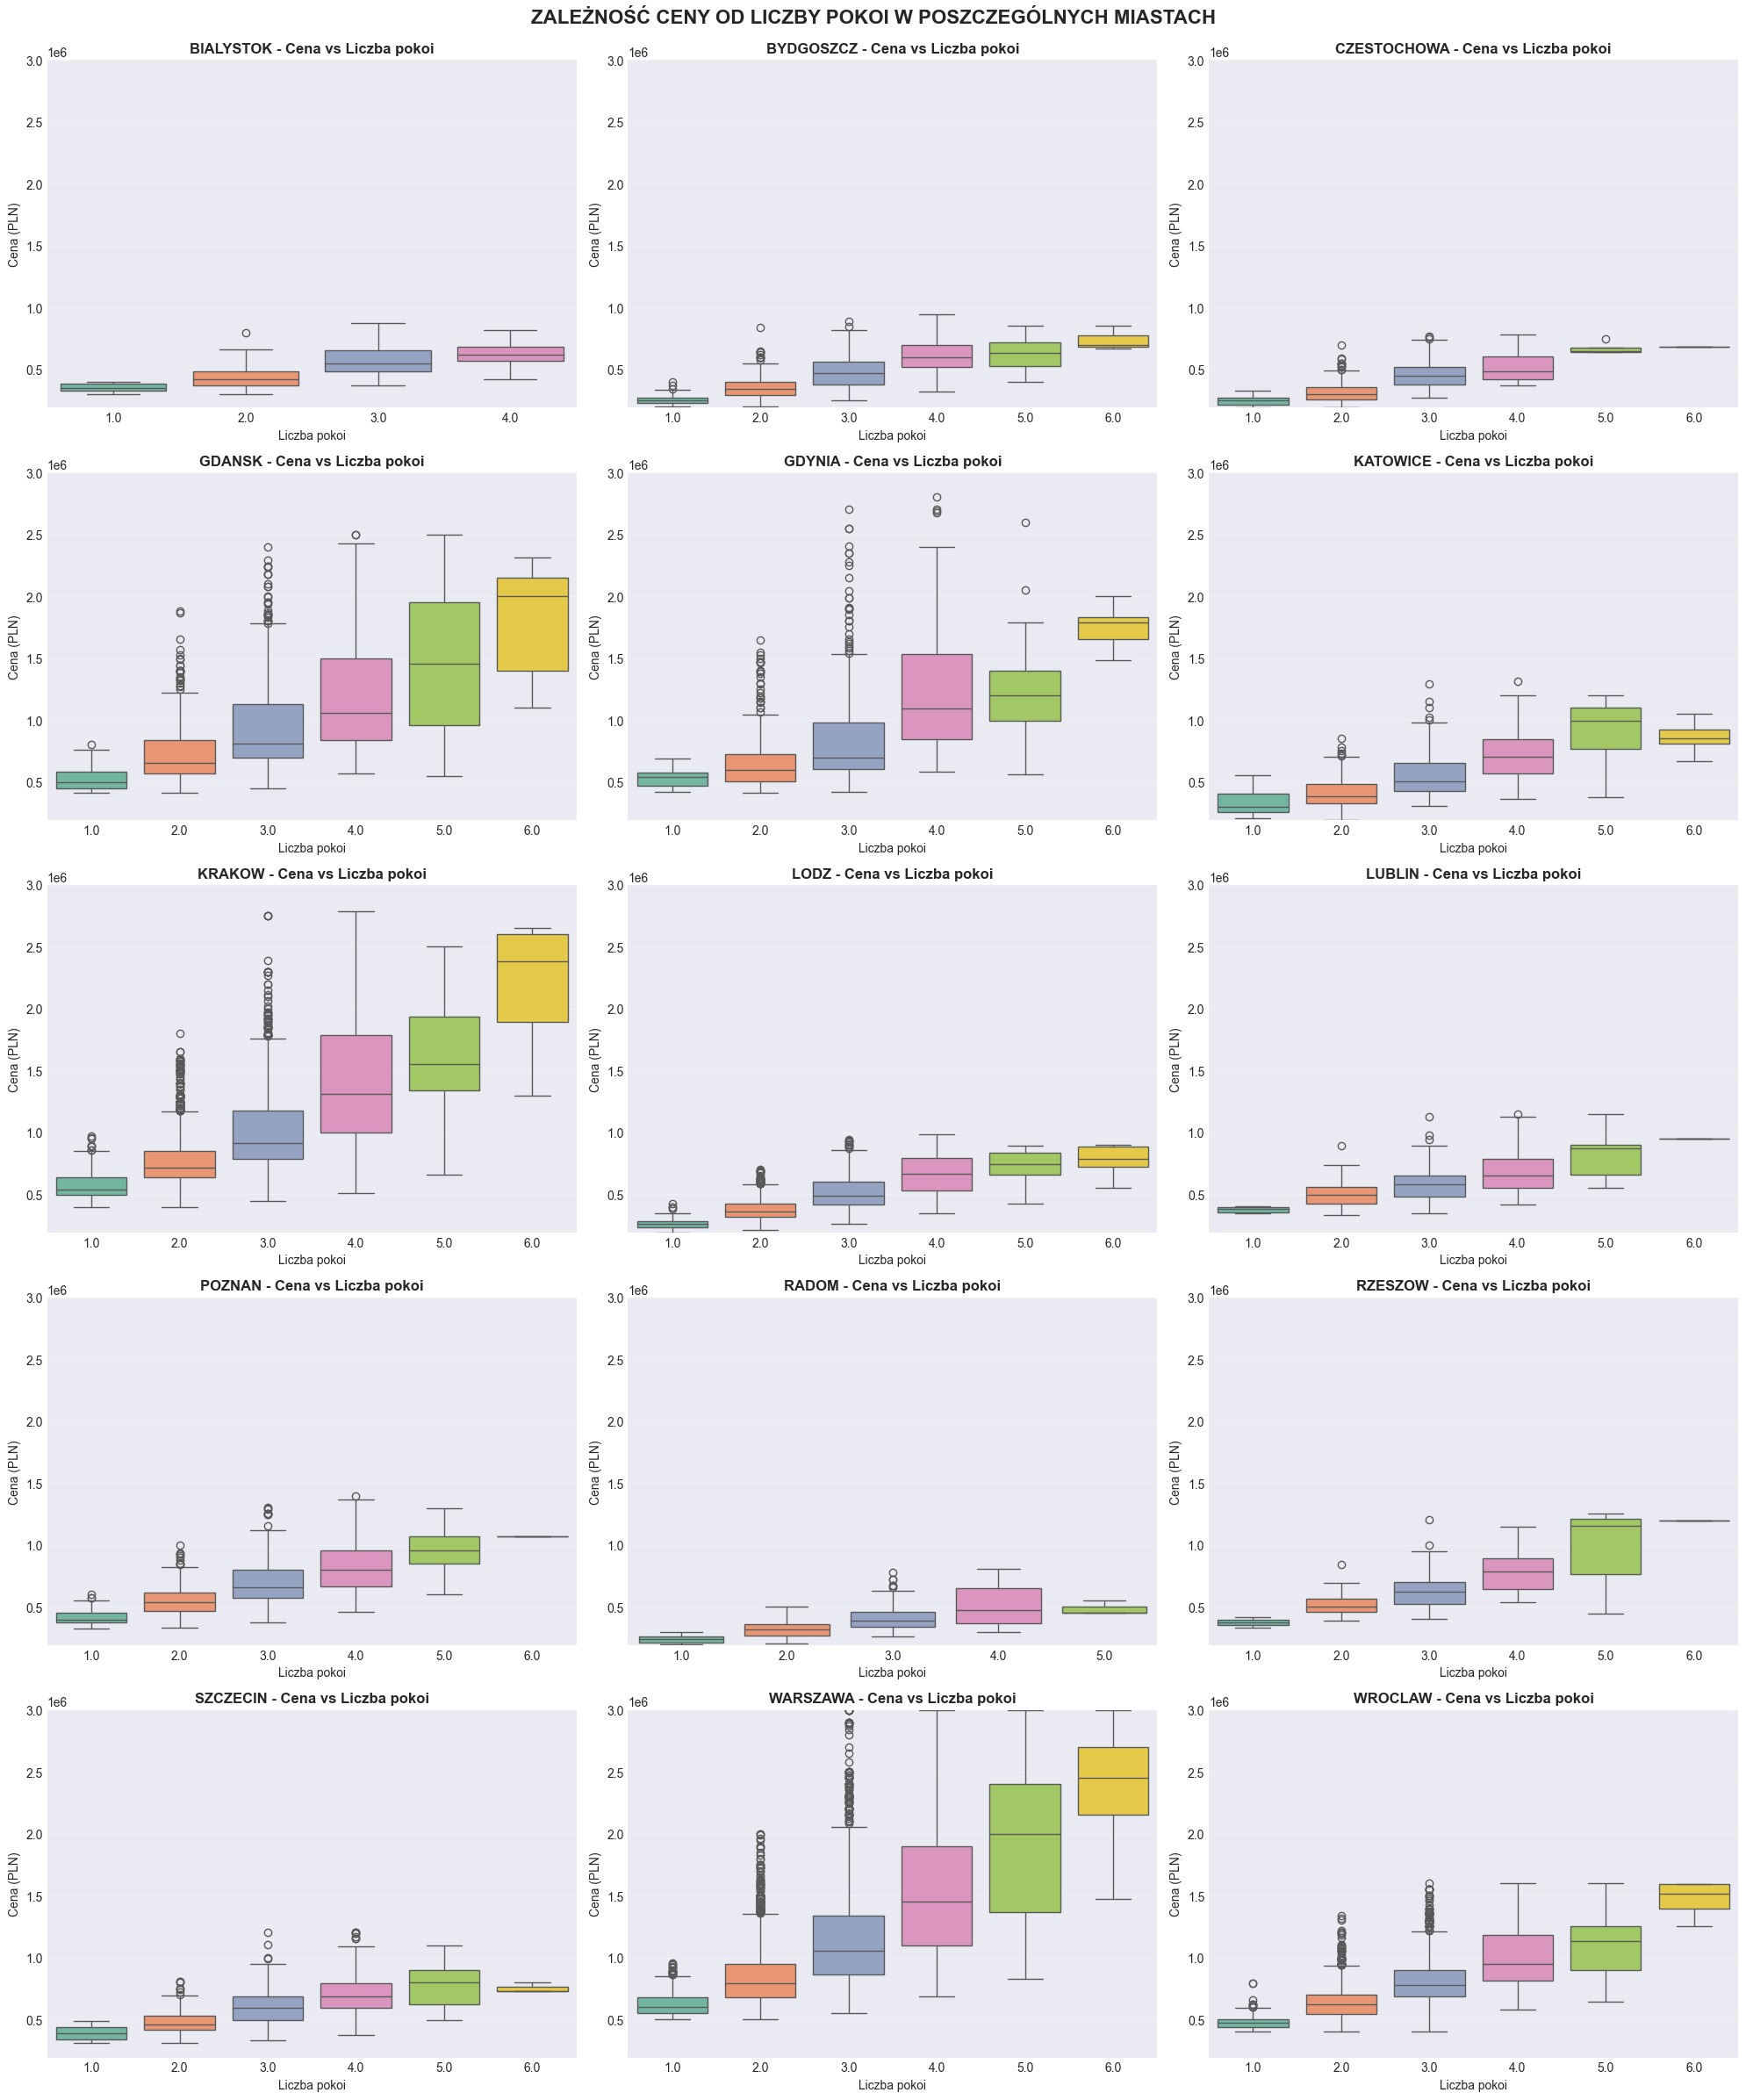

✅ Boxploty cena vs liczba pokoi dla wszystkich miast wygenerowane!


In [26]:
# ========================================
# CZĘŚĆ 5b: CENA VS LICZBA POKOI - PO MIASTACH
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cities = sorted(df['city'].unique())
n_cities = len(cities)

# Ustalamy wspólną skalę osi Y (cena)
y_min, y_max = df['price'].min(), df['price'].max()

fig, axes = plt.subplots(5, 3, figsize=(20, 24))
axes = axes.flatten()

for idx, city in enumerate(cities):
    city_data = df[df['city'] == city]
    
    sns.boxplot(data=city_data, x='rooms', y='price', ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{city.upper()} - Cena vs Liczba pokoi', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Liczba pokoi', fontsize=10)
    axes[idx].set_ylabel('Cena (PLN)', fontsize=10)
    
    # Wspólna skala osi Y
    axes[idx].set_ylim(y_min, y_max)
    
    axes[idx].grid(axis='y', alpha=0.3)

for idx in range(n_cities, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('ZALEŻNOŚĆ CENY OD LICZBY POKOI W POSZCZEGÓLNYCH MIASTACH', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✅ Boxploty cena vs liczba pokoi dla wszystkich miast wygenerowane!")
print("="*60)

C:\Users\levia\AppData\Local\Temp\ipykernel_15184\139178938.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rooms', y='price', palette='viridis')


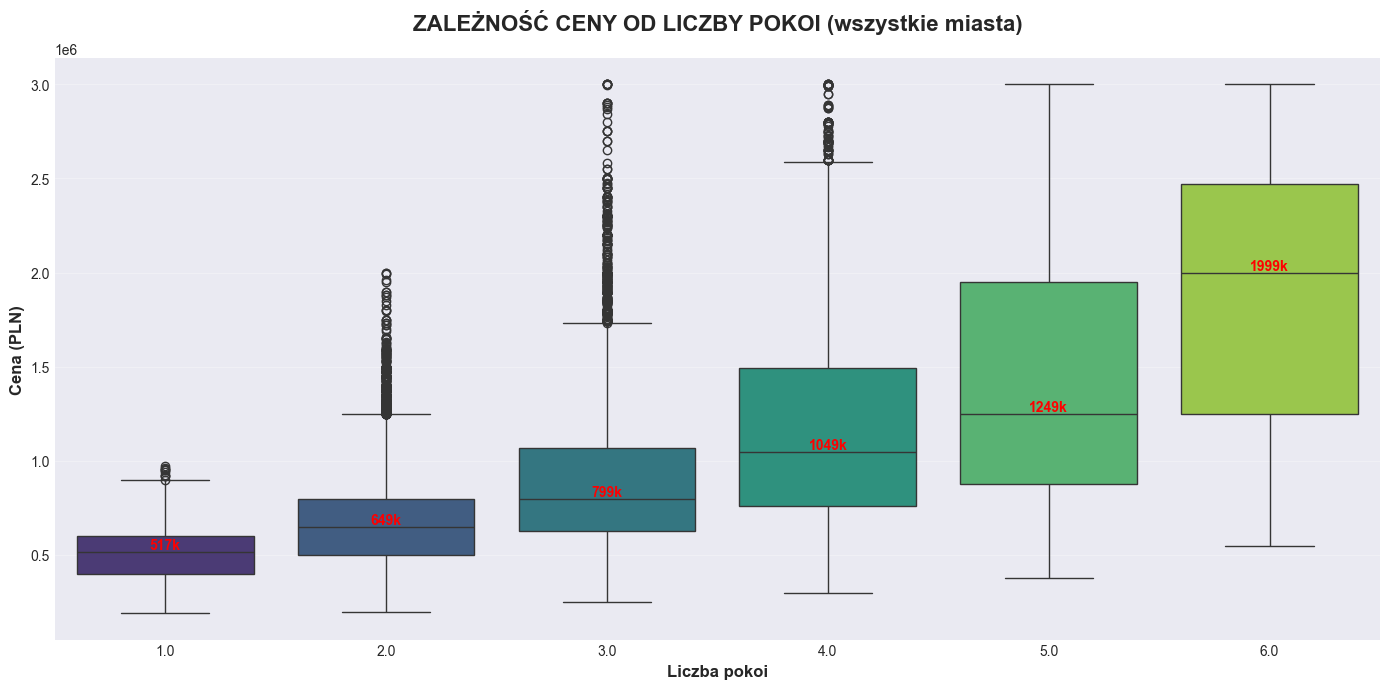

STATYSTYKI CENY WEDŁUG LICZBY POKOI
       Liczba ofert    Średnia    Mediana     Min      Max
rooms                                                     
1.0            1308   504602.0   517000.0  191000   970000
2.0            9310   671582.0   649000.0  195000  2000000
3.0            7842   890556.0   799000.0  249000  3000000
4.0            2404  1187753.0  1049000.0  299000  3000000
5.0             496  1410322.0  1249000.0  375000  2999000
6.0             141  1864664.0  1999000.0  550000  3000000

✅ Boxplot cena vs liczba pokoi wygenerowany!


In [36]:
# ========================================
# CZĘŚĆ 5: CENA VS LICZBA POKOI
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ========================================
# 5.1 BOXPLOT - CENA VS LICZBA POKOI (wszystkie miasta razem)
# ========================================

plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='rooms', y='price', palette='viridis')
plt.title('ZALEŻNOŚĆ CENY OD LICZBY POKOI (wszystkie miasta)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Liczba pokoi', fontsize=12, fontweight='bold')
plt.ylabel('Cena (PLN)', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Dodajemy mediany
room_medians = df.groupby('rooms')['price'].median()
for i, room in enumerate(sorted(df['rooms'].unique())):
    median_val = room_medians[room]
    plt.text(i, median_val, f'{median_val/1000:.0f}k', 
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

# Statystyki
print("="*60)
print("STATYSTYKI CENY WEDŁUG LICZBY POKOI")
print("="*60)

room_stats = df.groupby('rooms')['price'].agg([
    ('Liczba ofert', 'count'),
    ('Średnia', 'mean'),
    ('Mediana', 'median'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(0)

print(room_stats)

print("\n✅ Boxplot cena vs liczba pokoi wygenerowany!")
print("="*60)

C:\Users\levia\AppData\Local\Temp\ipykernel_15184\3175875580.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=city_data, x='rooms', y='price', ax=axes[idx], palette='Set2')
C:\Users\levia\AppData\Local\Temp\ipykernel_15184\3175875580.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=city_data, x='rooms', y='price', ax=axes[idx], palette='Set2')
C:\Users\levia\AppData\Local\Temp\ipykernel_15184\3175875580.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=city_data, x='rooms', y='price', ax=axes[idx], palette='Set2')
C

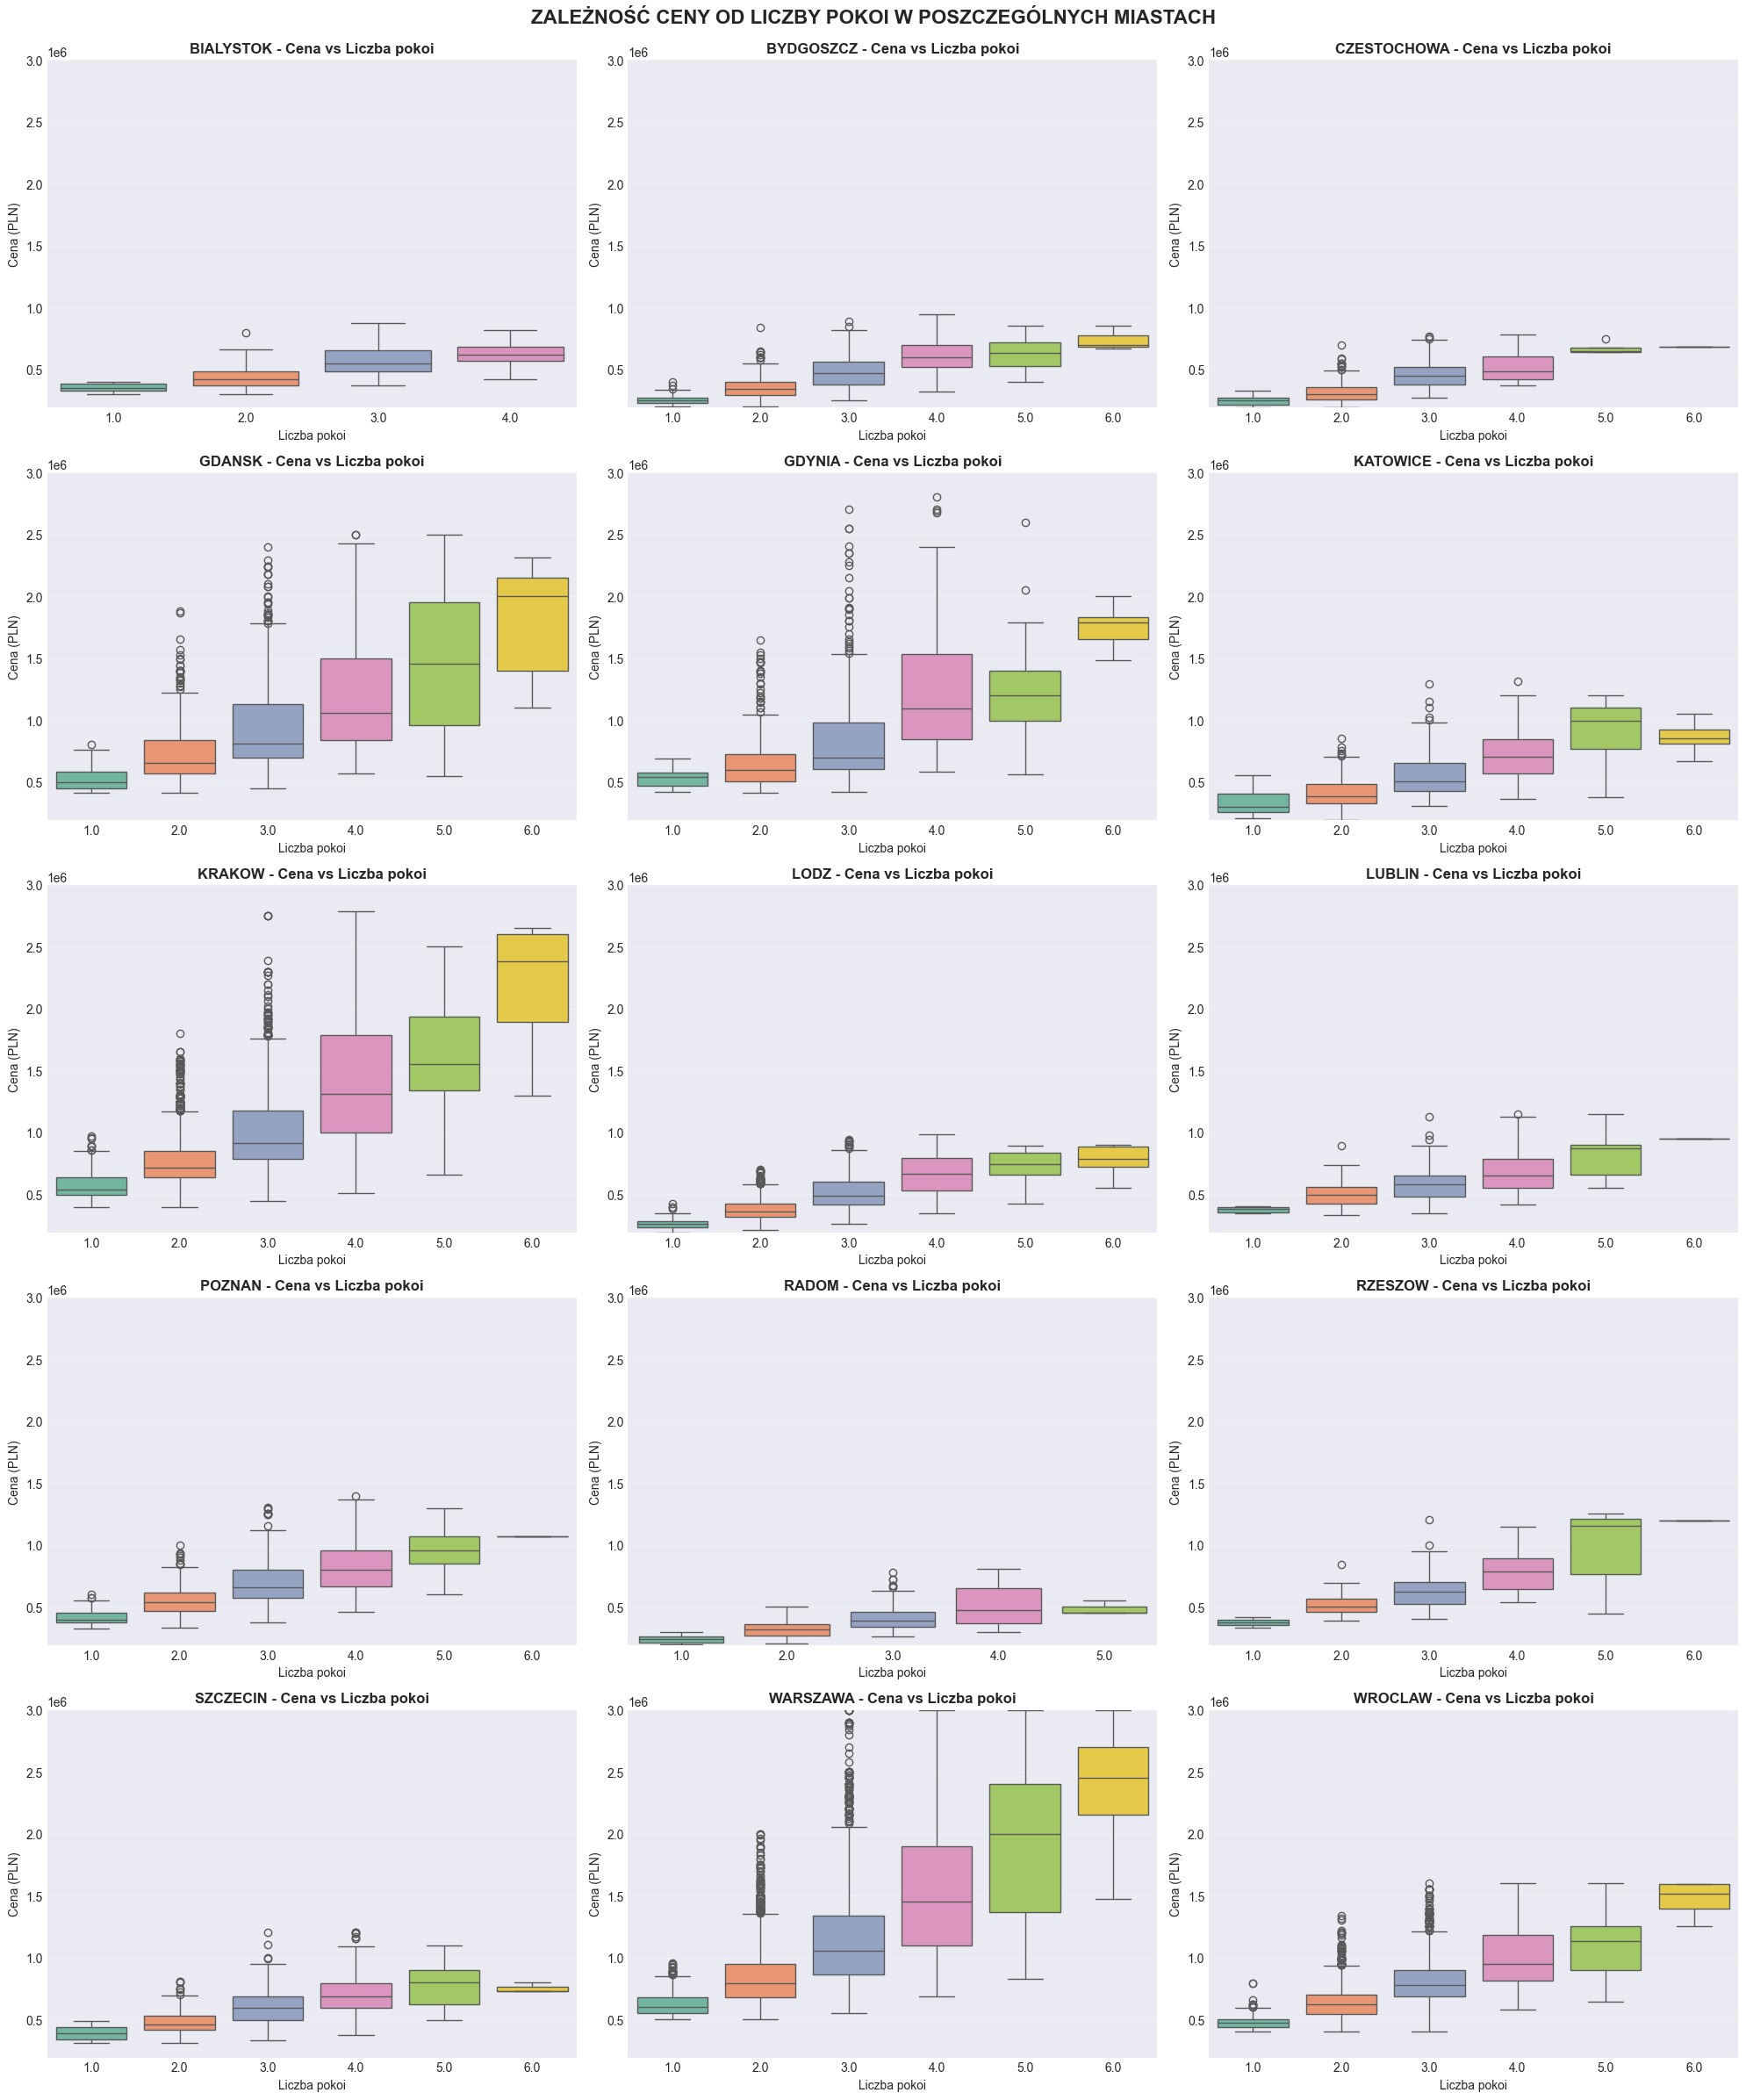

✅ Boxploty cena vs liczba pokoi dla wszystkich miast wygenerowane!


In [37]:
# ========================================
# CZĘŚĆ 5b: CENA VS LICZBA POKOI - PO MIASTACH
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cities = sorted(df['city'].unique())
n_cities = len(cities)

# Ustalamy wspólną skalę osi Y (cena)
y_min, y_max = df['price'].min(), df['price'].max()

fig, axes = plt.subplots(5, 3, figsize=(20, 24))
axes = axes.flatten()

for idx, city in enumerate(cities):
    city_data = df[df['city'] == city]
    
    sns.boxplot(data=city_data, x='rooms', y='price', ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{city.upper()} - Cena vs Liczba pokoi', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Liczba pokoi', fontsize=10)
    axes[idx].set_ylabel('Cena (PLN)', fontsize=10)
    
    # Wspólna skala osi Y
    axes[idx].set_ylim(y_min, y_max)
    
    axes[idx].grid(axis='y', alpha=0.3)

for idx in range(n_cities, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('ZALEŻNOŚĆ CENY OD LICZBY POKOI W POSZCZEGÓLNYCH MIASTACH', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✅ Boxploty cena vs liczba pokoi dla wszystkich miast wygenerowane!")
print("="*60)

C:\Users\levia\AppData\Local\Temp\ipykernel_15184\3550133182.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_temp, x=amenity, y='price', ax=axes[idx], palette='Set1')
C:\Users\levia\AppData\Local\Temp\ipykernel_15184\3550133182.py:33: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.boxplot(data=df_temp, x=amenity, y='price', ax=axes[idx], palette='Set1')


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

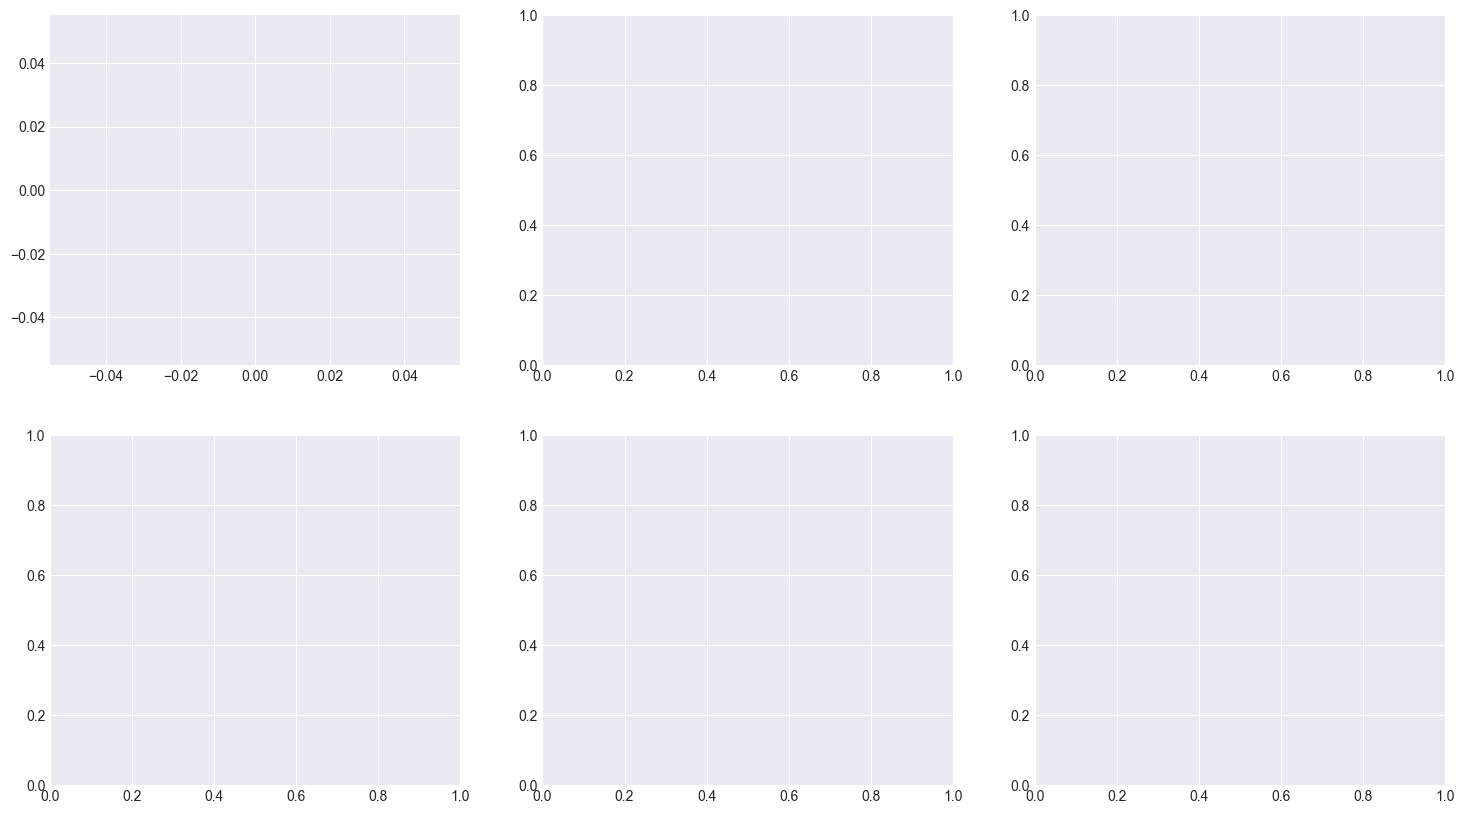

In [38]:
# ========================================
# CZĘŚĆ 6: CENA VS UDOGODNIENIA
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Lista udogodnień (zmienne binarne)
amenities = ['hasElevator', 'hasBalcony', 'hasParkingSpace', 'hasSecurity', 'hasStorageRoom']

# Mapowanie nazw na polski
amenity_names = {
    'hasElevator': 'Winda',
    'hasBalcony': 'Balkon',
    'hasParkingSpace': 'Parking',
    'hasSecurity': 'Ochrona',
    'hasStorageRoom': 'Komórka lokatorska'
}

# ========================================
# 6.1 BOXPLOTY - KAŻDE UDOGODNIENIE OSOBNO
# ========================================

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, amenity in enumerate(amenities):
    # Konwertujemy 0/1 na "Nie"/"Tak" dla lepszej czytelności
    df_temp = df.copy()
    df_temp[amenity] = df_temp[amenity].map({0: 'Nie', 1: 'Tak'})
    
    sns.boxplot(data=df_temp, x=amenity, y='price', ax=axes[idx], palette='Set1')
    axes[idx].set_title(f'Cena vs {amenity_names[amenity]}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(amenity_names[amenity], fontsize=11)
    axes[idx].set_ylabel('Cena (PLN)', fontsize=11)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Dodajemy mediany
    for i, category in enumerate(['Nie', 'Tak']):
        if category in df_temp[amenity].values:
            median_val = df_temp[df_temp[amenity] == category]['price'].median()
            axes[idx].text(i, median_val, f'{median_val/1000:.0f}k', 
                          ha='center', va='bottom', fontsize=9, fontweight='bold', color='red')

# Ukrywamy ostatni subplot
axes[-1].set_visible(False)

plt.suptitle('WPŁYW UDOGODNIEŃ NA CENĘ MIESZKANIA', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("✅ Boxploty cena vs udogodnienia wygenerowane!")
print("="*60)

In [39]:
# ========================================
# CZĘŚĆ 6b: STATYSTYKI CENOWE DLA UDOGODNIEŃ
# ========================================

import pandas as pd

amenities = ['hasElevator', 'hasBalcony', 'hasParkingSpace', 'hasSecurity', 'hasStorageRoom']

amenity_names = {
    'hasElevator': 'Winda',
    'hasBalcony': 'Balkon',
    'hasParkingSpace': 'Parking',
    'hasSecurity': 'Ochrona',
    'hasStorageRoom': 'Komórka lokatorska'
}

print("="*80)
print("WPŁYW UDOGODNIEŃ NA CENĘ - ANALIZA STATYSTYCZNA")
print("="*80)

for amenity in amenities:
    print(f"\n{'='*80}")
    print(f"📊 {amenity_names[amenity].upper()}")
    print(f"{'='*80}")
    
    # Statystyki dla mieszkań BEZ udogodnienia
    no_amenity = df[df[amenity] == 0]['price']
    # Statystyki dla mieszkań Z udogodnieniem
    yes_amenity = df[df[amenity] == 1]['price']
    
    print(f"\n{'Bez ' + amenity_names[amenity]:.<30} {'Z ' + amenity_names[amenity]:.<30}")
    print(f"{'Liczba ofert:':<20} {len(no_amenity):<10} {len(yes_amenity):<10}")
    print(f"{'Średnia cena:':<20} {no_amenity.mean():>10,.0f} PLN    {yes_amenity.mean():>10,.0f} PLN")
    print(f"{'Mediana ceny:':<20} {no_amenity.median():>10,.0f} PLN    {yes_amenity.median():>10,.0f} PLN")
    
    # Różnica w cenie
    diff_mean = yes_amenity.mean() - no_amenity.mean()
    diff_median = yes_amenity.median() - no_amenity.median()
    diff_pct_mean = (diff_mean / no_amenity.mean()) * 100
    diff_pct_median = (diff_median / no_amenity.median()) * 100
    
    print(f"\n{'RÓŻNICA (średnia):':<30} {diff_mean:>+10,.0f} PLN ({diff_pct_mean:>+6.2f}%)")
    print(f"{'RÓŻNICA (mediana):':<30} {diff_median:>+10,.0f} PLN ({diff_pct_median:>+6.2f}%)")

print("\n" + "="*80)
print("✅ Analiza wpływu udogodnień zakończona!")
print("="*80)

WPŁYW UDOGODNIEŃ NA CENĘ - ANALIZA STATYSTYCZNA

📊 WINDA

Bez Winda..................... Z Winda.......................
Liczba ofert:        0          0         
Średnia cena:               nan PLN           nan PLN
Mediana ceny:               nan PLN           nan PLN

RÓŻNICA (średnia):                   +nan PLN (  +nan%)
RÓŻNICA (mediana):                   +nan PLN (  +nan%)

📊 BALKON

Bez Balkon.................... Z Balkon......................
Liczba ofert:        0          0         
Średnia cena:               nan PLN           nan PLN
Mediana ceny:               nan PLN           nan PLN

RÓŻNICA (średnia):                   +nan PLN (  +nan%)
RÓŻNICA (mediana):                   +nan PLN (  +nan%)

📊 PARKING

Bez Parking................... Z Parking.....................
Liczba ofert:        0          0         
Średnia cena:               nan PLN           nan PLN
Mediana ceny:               nan PLN           nan PLN

RÓŻNICA (średnia):                   +nan PLN (  +nan

In [40]:
# ========================================
# CZĘŚĆ 7: HEATMAPA KORELACJI
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ========================================
# 7.1 WYBÓR ZMIENNYCH NUMERYCZNYCH
# ========================================

# Wybieramy najważniejsze zmienne numeryczne do analizy korelacji
numeric_vars = [
    'price', 
    'price_per_m2',
    'squareMeters', 
    'rooms', 
    'floor', 
    'floorCount',
    'buildYear', 
    'centreDistance',
    'poiCount',
    'schoolDistance',
    'clinicDistance',
    'postOfficeDistance',
    'kindergartenDistance',
    'restaurantDistance',
    'collegeDistance',
    'pharmacyDistance',
    'hasElevator',
    'hasBalcony',
    'hasParkingSpace',
    'hasSecurity',
    'hasStorageRoom'
]

# Tworzymy macierz korelacji
correlation_matrix = df[numeric_vars].corr()

# ========================================
# 7.2 PEŁNA HEATMAPA KORELACJI
# ========================================

plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('MACIERZ KORELACJI - WSZYSTKIE ZMIENNE', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

print("✅ Pełna heatmapa korelacji wygenerowana!")
print("="*60)

ValueError: could not convert string to float: 'yes'

In [41]:
# ========================================
# CZĘŚĆ 7b: KORELACJA Z CENĄ - RANKING
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Korelacja wszystkich zmiennych z ceną
price_correlation = df[numeric_vars].corr()['price'].sort_values(ascending=False)

# Usuwamy samą cenę z listy
price_correlation = price_correlation.drop('price')

print("="*60)
print("KORELACJA ZMIENNYCH Z CENĄ (ranking)")
print("="*60)
print(price_correlation)

# ========================================
# WIZUALIZACJA - BARPLOT
# ========================================

plt.figure(figsize=(12, 10))
colors = ['green' if x > 0 else 'red' for x in price_correlation.values]
plt.barh(range(len(price_correlation)), price_correlation.values, color=colors, alpha=0.7, edgecolor='black')
plt.yticks(range(len(price_correlation)), price_correlation.index, fontsize=10)
plt.xlabel('Korelacja z ceną', fontsize=12, fontweight='bold')
plt.title('KORELACJA ZMIENNYCH Z CENĄ MIESZKANIA', fontsize=14, fontweight='bold', pad=15)
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)

# Dodajemy wartości na słupkach
for i, v in enumerate(price_correlation.values):
    plt.text(v, i, f' {v:.3f}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Ranking korelacji z ceną wygenerowany!")
print("="*60)

ValueError: could not convert string to float: 'yes'

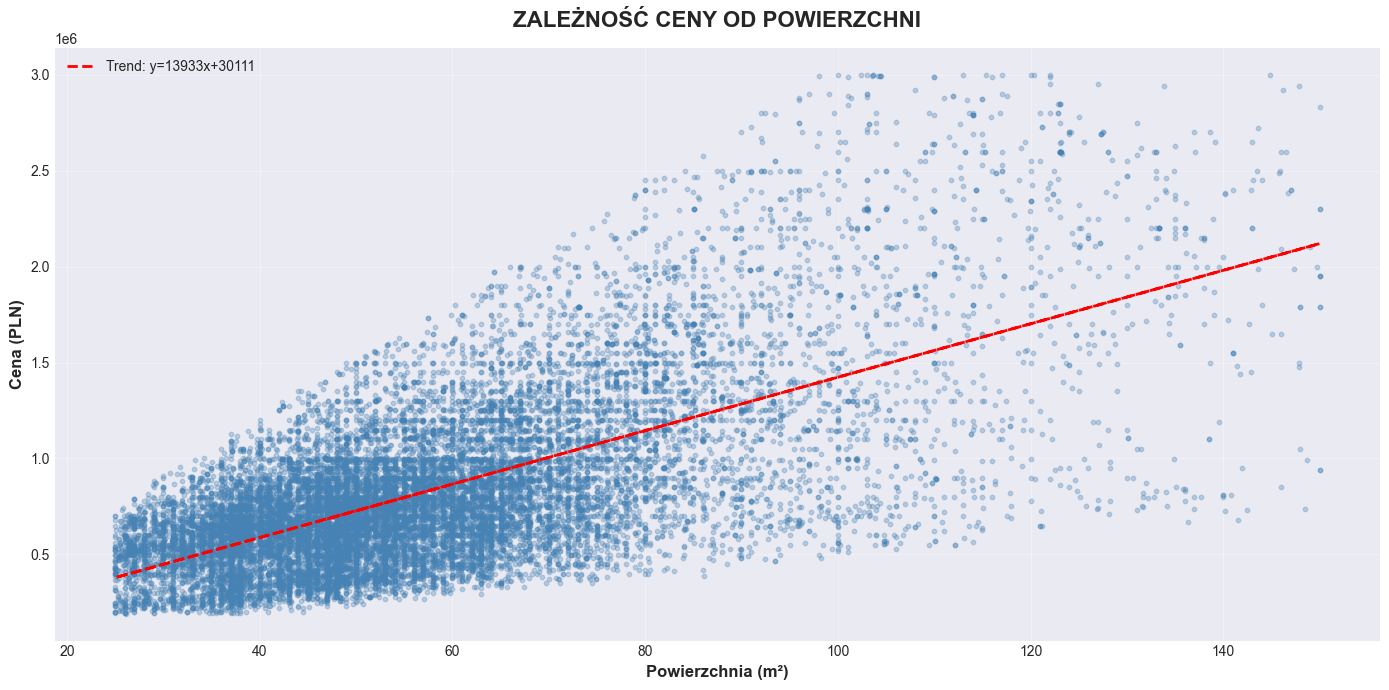

Korelacja powierzchnia-cena: 0.6663


In [42]:
# ========================================
# CZĘŚĆ 8: SCATTERPLOTY - KLUCZOWE ZALEŻNOŚCI
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ========================================
# 8.1 CENA VS POWIERZCHNIA
# ========================================

plt.figure(figsize=(14, 7))
plt.scatter(df['squareMeters'], df['price'], alpha=0.3, s=10, c='steelblue')
plt.title('ZALEŻNOŚĆ CENY OD POWIERZCHNI', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Powierzchnia (m²)', fontsize=12, fontweight='bold')
plt.ylabel('Cena (PLN)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Dodajemy linię trendu
z = np.polyfit(df['squareMeters'], df['price'], 1)
p = np.poly1d(z)
plt.plot(df['squareMeters'], p(df['squareMeters']), "r--", linewidth=2, label=f'Trend: y={z[0]:.0f}x+{z[1]:.0f}')
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

# Korelacja
corr = df['squareMeters'].corr(df['price'])
print(f"Korelacja powierzchnia-cena: {corr:.4f}")
print("="*60)

LinAlgError: SVD did not converge in Linear Least Squares

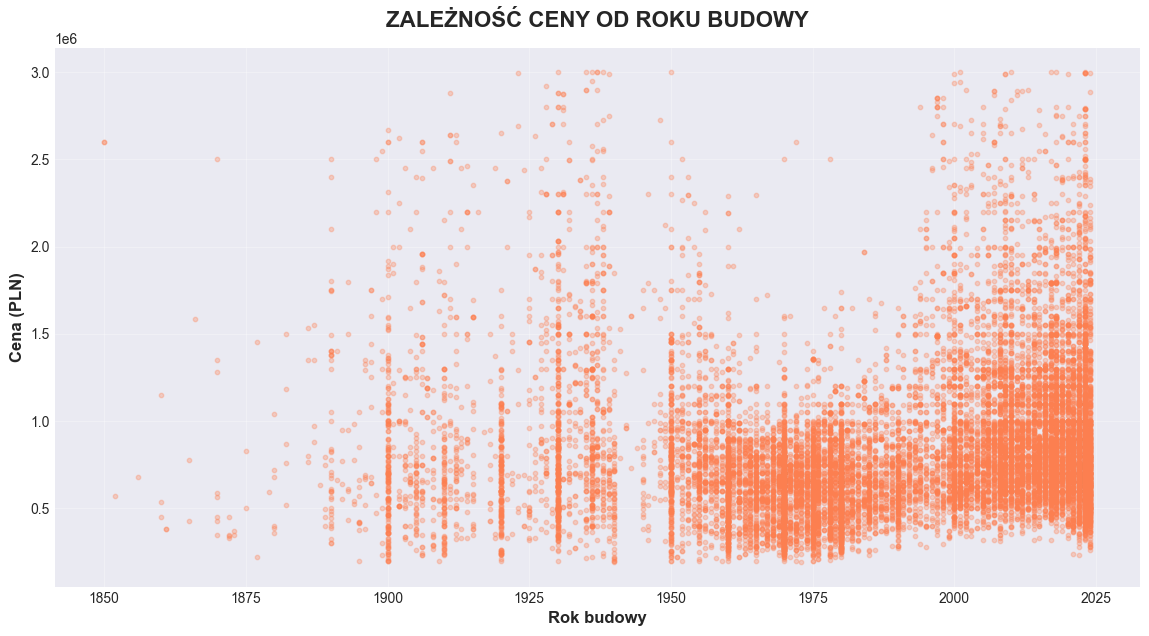

In [43]:
# ========================================
# CZĘŚĆ 8b: CENA VS ROK BUDOWY
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 7))
plt.scatter(df['buildYear'], df['price'], alpha=0.3, s=10, c='coral')
plt.title('ZALEŻNOŚĆ CENY OD ROKU BUDOWY', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Rok budowy', fontsize=12, fontweight='bold')
plt.ylabel('Cena (PLN)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Dodajemy linię trendu
z = np.polyfit(df['buildYear'], df['price'], 1)
p = np.poly1d(z)
plt.plot(df['buildYear'], p(df['buildYear']), "r--", linewidth=2, label=f'Trend: y={z[0]:.0f}x+{z[1]:.0f}')
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

# Korelacja
corr = df['buildYear'].corr(df['price'])
print(f"Korelacja rok budowy-cena: {corr:.4f}")
print("="*60)

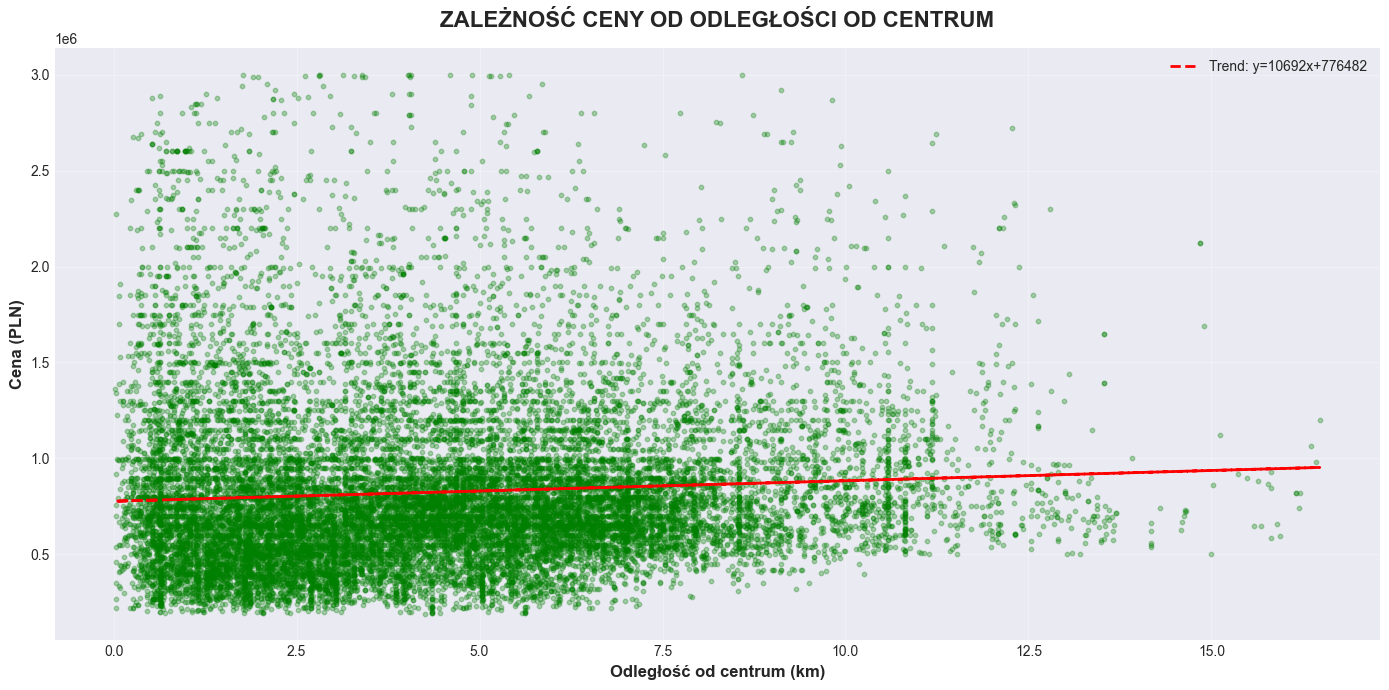

Korelacja odległość od centrum-cena: 0.0690


In [44]:
# ========================================
# CZĘŚĆ 8c: CENA VS ODLEGŁOŚĆ OD CENTRUM
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 7))
plt.scatter(df['centreDistance'], df['price'], alpha=0.3, s=10, c='green')
plt.title('ZALEŻNOŚĆ CENY OD ODLEGŁOŚCI OD CENTRUM', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Odległość od centrum (km)', fontsize=12, fontweight='bold')
plt.ylabel('Cena (PLN)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Dodajemy linię trendu
z = np.polyfit(df['centreDistance'], df['price'], 1)
p = np.poly1d(z)
plt.plot(df['centreDistance'], p(df['centreDistance']), "r--", linewidth=2, label=f'Trend: y={z[0]:.0f}x+{z[1]:.0f}')
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

# Korelacja
corr = df['centreDistance'].corr(df['price'])
print(f"Korelacja odległość od centrum-cena: {corr:.4f}")
print("="*60)

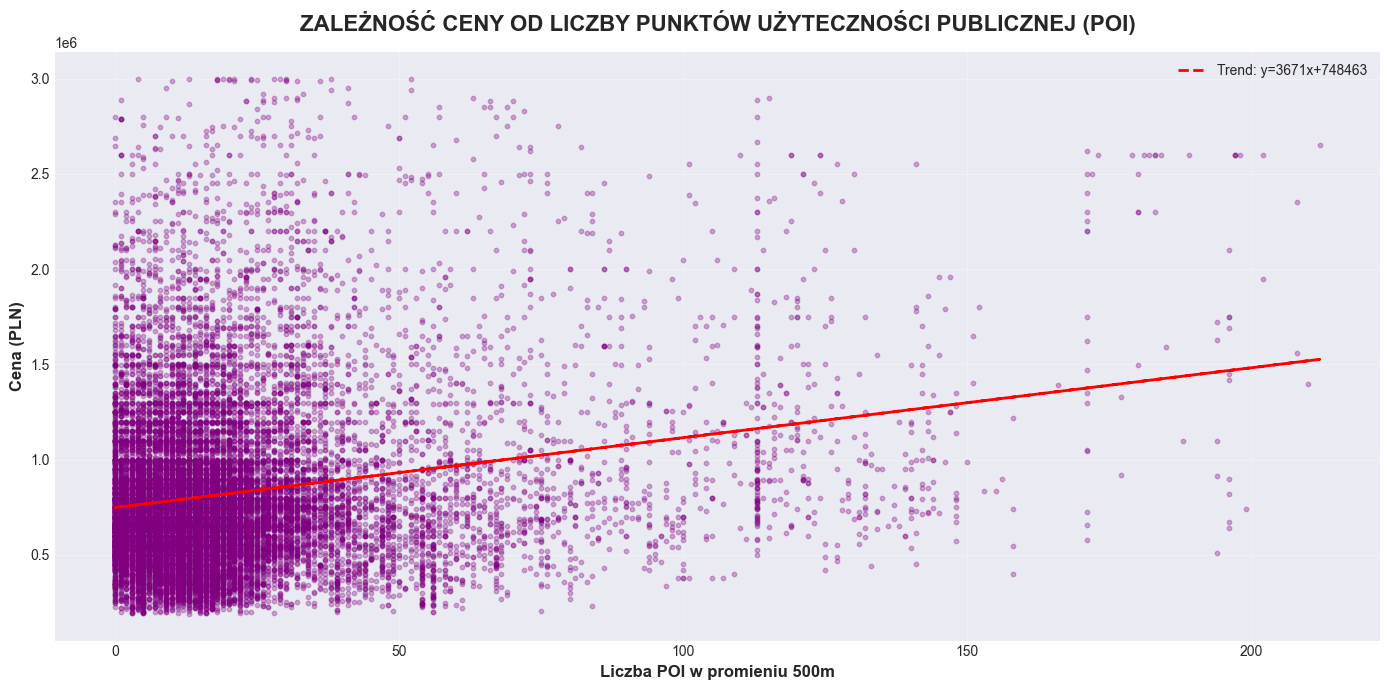

Korelacja liczba POI-cena: 0.2035


In [45]:
# ========================================
# CZĘŚĆ 8d: CENA VS LICZBA POI (Points of Interest)
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 7))
plt.scatter(df['poiCount'], df['price'], alpha=0.3, s=10, c='purple')
plt.title('ZALEŻNOŚĆ CENY OD LICZBY PUNKTÓW UŻYTECZNOŚCI PUBLICZNEJ (POI)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Liczba POI w promieniu 500m', fontsize=12, fontweight='bold')
plt.ylabel('Cena (PLN)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Dodajemy linię trendu
z = np.polyfit(df['poiCount'], df['price'], 1)
p = np.poly1d(z)
plt.plot(df['poiCount'], p(df['poiCount']), "r--", linewidth=2, label=f'Trend: y={z[0]:.0f}x+{z[1]:.0f}')
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

# Korelacja
corr = df['poiCount'].corr(df['price'])
print(f"Korelacja liczba POI-cena: {corr:.4f}")
print("="*60)

Generowanie pairplot (może potrwać kilka sekund)...


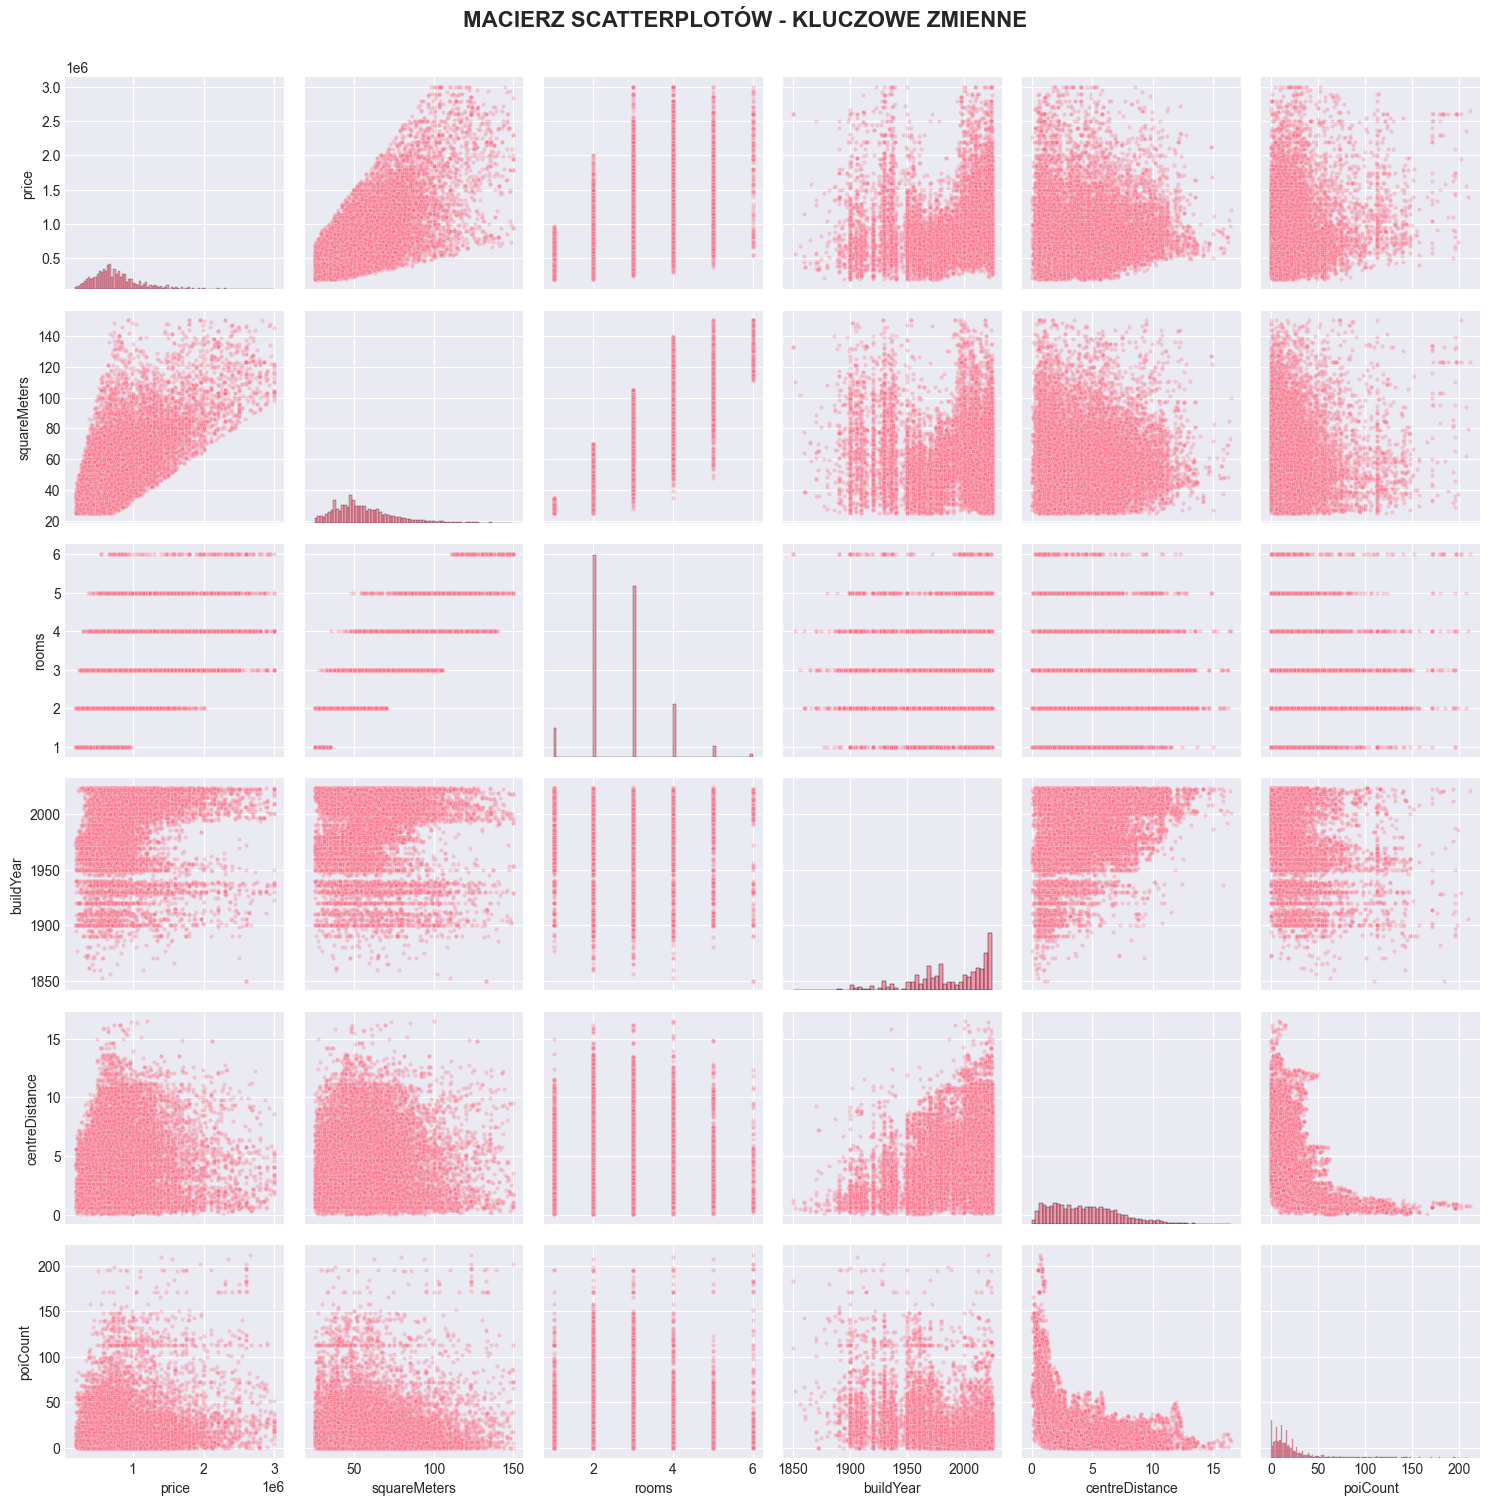

✅ Pairplot wygenerowany!


In [46]:
# ========================================
# CZĘŚĆ 8e: PAIRPLOT - ZALEŻNOŚCI MIĘDZY KLUCZOWYMI ZMIENNYMI
# ========================================

import matplotlib.pyplot as plt
import seaborn as sns

# Wybieramy najważniejsze zmienne do pairplot
key_vars_pairplot = ['price', 'squareMeters', 'rooms', 'buildYear', 'centreDistance', 'poiCount']

print("Generowanie pairplot (może potrwać kilka sekund)...")

# Tworzymy pairplot
pairplot_fig = sns.pairplot(df[key_vars_pairplot], 
                             diag_kind='hist', 
                             plot_kws={'alpha': 0.3, 's': 10},
                             diag_kws={'edgecolor': 'black', 'alpha': 0.7},
                             height=2.5)

pairplot_fig.fig.suptitle('MACIERZ SCATTERPLOTÓW - KLUCZOWE ZMIENNE', 
                           fontsize=16, fontweight='bold', y=1.001)

plt.tight_layout()
plt.show()

print("✅ Pairplot wygenerowany!")
print("="*60)

In [47]:
# ========================================
# CZĘŚĆ 9: ANALIZA REGRESJI - CZYNNIKI WPŁYWAJĄCE NA CENĘ
# ========================================

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

print("="*80)
print("ANALIZA REGRESJI LINIOWEJ - IDENTYFIKACJA NAJWAŻNIEJSZYCH CZYNNIKÓW CENOTWÓRCZYCH")
print("="*80)

# ========================================
# 9.1 PRZYGOTOWANIE DANYCH
# ========================================

# Wybieramy zmienne do modelu (wszystkie numeryczne)
feature_cols = [
    'squareMeters', 
    'rooms', 
    'floor', 
    'floorCount',
    'buildYear', 
    'centreDistance',
    'poiCount',
    'schoolDistance',
    'clinicDistance',
    'postOfficeDistance',
    'kindergartenDistance',
    'restaurantDistance',
    'collegeDistance',
    'pharmacyDistance',
    'hasElevator',
    'hasBalcony',
    'hasParkingSpace',
    'hasSecurity',
    'hasStorageRoom'
]

# Przygotowanie danych
X = df[feature_cols].copy()
y = df['price'].copy()

# Usuwamy ewentualne braki (na всякий przypadek)
mask = ~(X.isna().any(axis=1) | y.isna())
X = X[mask]
y = y[mask]

print(f"\n📊 Liczba obserwacji w modelu: {len(X):,}")
print(f"📊 Liczba zmiennych: {len(feature_cols)}")

# ========================================
# 9.2 BUDOWA MODELU
# ========================================

# Standaryzacja zmiennych (dla porównywalności współczynników)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Budowa modelu
model = LinearRegression()
model.fit(X_scaled, y)

# R² - jakość dopasowania
r2_score = model.score(X_scaled, y)

print(f"\n📈 R² (współczynnik determinacji): {r2_score:.4f}")
print(f"   -> Model wyjaśnia {r2_score*100:.2f}% zmienności ceny mieszkań")

# ========================================
# 9.3 RANKING WAŻNOŚCI ZMIENNYCH
# ========================================

# Współczynniki regresji (standardized)
coefficients = pd.DataFrame({
    'Zmienna': feature_cols,
    'Współczynnik': model.coef_
})

# Sortujemy według wartości bezwzględnej (siła wpływu)
coefficients['Abs_Współczynnik'] = coefficients['Współczynnik'].abs()
coefficients = coefficients.sort_values('Abs_Współczynnik', ascending=False)

print("\n" + "="*80)
print("RANKING WAŻNOŚCI ZMIENNYCH (współczynniki standaryzowane)")
print("="*80)
print(coefficients[['Zmienna', 'Współczynnik']].to_string(index=False))

print("\n✅ Analiza regresji zakończona!")
print("="*80)

ANALIZA REGRESJI LINIOWEJ - IDENTYFIKACJA NAJWAŻNIEJSZYCH CZYNNIKÓW CENOTWÓRCZYCH

📊 Liczba obserwacji w modelu: 14,322
📊 Liczba zmiennych: 19


ValueError: could not convert string to float: 'yes'

In [48]:
# ========================================
# CZĘŚĆ 9b: WIZUALIZACJA WAŻNOŚCI ZMIENNYCH Z REGRESJI
# ========================================

import matplotlib.pyplot as plt

# Top 15 najważniejszych zmiennych
top_15 = coefficients.head(15).copy()

plt.figure(figsize=(12, 8))
colors = ['green' if x > 0 else 'red' for x in top_15['Współczynnik'].values]
plt.barh(range(len(top_15)), top_15['Współczynnik'].values, color=colors, alpha=0.7, edgecolor='black')
plt.yticks(range(len(top_15)), top_15['Zmienna'].values, fontsize=11)
plt.xlabel('Współczynnik regresji (standaryzowany)', fontsize=12, fontweight='bold')
plt.title('TOP 15 NAJWAŻNIEJSZYCH CZYNNIKÓW WPŁYWAJĄCYCH NA CENĘ', fontsize=14, fontweight='bold', pad=15)
plt.axvline(0, color='black', linewidth=1)
plt.grid(axis='x', alpha=0.3)

# Dodajemy wartości
for i, v in enumerate(top_15['Współczynnik'].values):
    plt.text(v, i, f' {v:,.0f}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Wizualizacja ważności zmiennych wygenerowana!")
print("="*60)

NameError: name 'coefficients' is not defined

In [50]:
# ========================================
# CZĘŚĆ 10: PODSUMOWANIE I KLUCZOWE WNIOSKI
# ========================================

import pandas as pd
import numpy as np

print("="*80)
print("📊 PODSUMOWANIE ANALIZY RYNKU MIESZKANIOWEGO W POLSCE")
print("="*80)

# ========================================
# 10.1 CHARAKTERYSTYKA RYNKU PO MIASTACH
# ========================================

print("\n" + "="*80)
print("1. CHARAKTERYSTYKA RYNKU W POSZCZEGÓLNYCH MIASTACH")
print("="*80)

city_summary = df.groupby('city').agg({
    'price': ['mean', 'median', 'count'],
    'price_per_m2': ['mean', 'median'],
    'squareMeters': 'mean',
    'rooms': 'mean',
    'buildYear': 'mean'
}).round(0)

city_summary.columns = ['Śr. cena', 'Med. cena', 'Liczba ofert', 
                        'Śr. PLN/m²', 'Med. PLN/m²', 
                        'Śr. m²', 'Śr. pokoi', 'Śr. rok bud.']

# Sortujemy według mediany ceny
city_summary = city_summary.sort_values('Med. cena', ascending=False)

print(city_summary)

# ========================================
# 10.2 NAJDROŻSZE I NAJTAŃSZE MIASTA
# ========================================

print("\n" + "="*80)
print("2. RANKING MIAST WEDŁUG CENY ZA M²")
print("="*80)

price_m2_ranking = df.groupby('city')['price_per_m2'].median().sort_values(ascending=False)

print("\n🏆 TOP 5 NAJDROŻSZYCH MIAST (mediana PLN/m²):")
for i, (city, price) in enumerate(price_m2_ranking.head(5).items(), 1):
    print(f"   {i}. {city.upper():<15} {price:>10,.0f} PLN/m²")

print("\n💰 TOP 5 NAJTAŃSZYCH MIAST (mediana PLN/m²):")
for i, (city, price) in enumerate(price_m2_ranking.tail(5).sort_values().items(), 1):
    print(f"   {i}. {city.upper():<15} {price:>10,.0f} PLN/m²")

# ========================================
# 10.3 NAJWAŻNIEJSZE CZYNNIKI CENOTWÓRCZE
# ========================================

print("\n" + "="*80)
print("3. NAJWAŻNIEJSZE CZYNNIKI WPŁYWAJĄCE NA CENĘ (z analizy korelacji)")
print("="*80)

# Top korelacje
top_correlations = df[numeric_vars].corr()['price'].drop('price').abs().sort_values(ascending=False).head(10)

print("\n🔝 TOP 10 ZMIENNYCH NAJBARDZIEJ SKORELOWANYCH Z CENĄ:")
for i, (var, corr) in enumerate(top_correlations.items(), 1):
    direction = "📈 Pozytywna" if df[var].corr(df['price']) > 0 else "📉 Negatywna"
    print(f"   {i}. {var:<25} r={corr:.4f}  ({direction})")

# ========================================
# 10.4 WPŁYW UDOGODNIEŃ
# ========================================

print("\n" + "="*80)
print("4. WPŁYW UDOGODNIEŃ NA CENĘ (różnica w medianie)")
print("="*80)

amenities = ['hasElevator', 'hasBalcony', 'hasParkingSpace', 'hasSecurity', 'hasStorageRoom']
amenity_names = {
    'hasElevator': 'Winda',
    'hasBalcony': 'Balkon',
    'hasParkingSpace': 'Parking',
    'hasSecurity': 'Ochrona',
    'hasStorageRoom': 'Komórka'
}

amenity_impact = {}
for amenity in amenities:
    no = df[df[amenity] == 0]['price'].median()
    yes = df[df[amenity] == 1]['price'].median()
    diff = yes - no
    diff_pct = (diff / no) * 100
    amenity_impact[amenity_names[amenity]] = {'Różnica': diff, 'Procent': diff_pct}

amenity_df = pd.DataFrame(amenity_impact).T.sort_values('Różnica', ascending=False)

print("\n💎 Ranking udogodnień według wpływu na cenę:")
for i, (amenity, row) in enumerate(amenity_df.iterrows(), 1):
    print(f"   {i}. {amenity:<20} +{row['Różnica']:>10,.0f} PLN ({row['Procent']:>+6.1f}%)")

# ========================================
# 10.5 KLUCZOWE WNIOSKI
# ========================================

print("\n" + "="*80)
print("5. KLUCZOWE WNIOSKI")
print("="*80)

print(f"""
✅ Dataset zawiera {len(df):,} ofert mieszkań z {df['city'].nunique()} miast Polski.

🏙️  RÓŻNICE REGIONALNE:
   • Najdroższe miasto: {price_m2_ranking.index[0].upper()} ({price_m2_ranking.iloc[0]:,.0f} PLN/m²)
   • Najtańsze miasto: {price_m2_ranking.index[-1].upper()} ({price_m2_ranking.iloc[-1]:,.0f} PLN/m²)
   • Różnica: {(price_m2_ranking.iloc[0] / price_m2_ranking.iloc[-1] - 1)*100:.1f}%

📏 CHARAKTERYSTYKA MIESZKAŃ:
   • Średnia powierzchnia: {df['squareMeters'].mean():.1f} m²
   • Średnia liczba pokoi: {df['rooms'].mean():.2f}
   • Średni rok budowy: {df['buildYear'].mean():.0f}

💰 CZYNNIKI CENOTWÓRCZE:
   • Powierzchnia ma najsilniejszy wpływ na cenę (r={df['squareMeters'].corr(df['price']):.4f})
   • Liczba pokoi również silnie skorelowana (r={df['rooms'].corr(df['price']):.4f})
   • Lokalizacja ma znaczenie - odległość od centrum (r={df['centreDistance'].corr(df['price']):.4f})

🏠 UDOGODNIENIA:
   • Największy wpływ: {amenity_df.index[0]} (+{amenity_df['Różnica'].iloc[0]:,.0f} PLN)
   • Najmniejszy wpływ: {amenity_df.index[-1]} (+{amenity_df['Różnica'].iloc[-1]:,.0f} PLN)
""")

print("="*80)
print("✅ ANALIZA EKSPLORACYJNA DANYCH ZAKOŃCZONA!")
print("="*80)

📊 PODSUMOWANIE ANALIZY RYNKU MIESZKANIOWEGO W POLSCE

1. CHARAKTERYSTYKA RYNKU W POSZCZEGÓLNYCH MIASTACH
              Śr. cena  Med. cena  Liczba ofert  Śr. PLN/m²  Med. PLN/m²  \
city                                                                       
warszawa     1053134.0   899000.0          6962     18504.0      17917.0   
krakow        942169.0   805000.0          3245     17135.0      16353.0   
gdansk        891338.0   765000.0          1986     15402.0      14054.0   
gdynia        884685.0   720000.0           828     14020.0      12652.0   
wroclaw       745965.0   695000.0          2271     13562.0      13085.0   
poznan        647102.0   599000.0           793     11472.0      11019.0   
rzeszow       636871.0   590000.0           163     10804.0      10811.0   
lublin        581739.0   554700.0           574     10061.0       9890.0   
szczecin      572549.0   540000.0           647      9529.0       9216.0   
bialystok     511691.0   498900.0           231     10089.0

ValueError: could not convert string to float: 'yes'